<h1> Análise de Crime na Cidade de Chicago <h1/>

In [2]:
# Pacotes a usar na análise
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
import datetime
import statistics 
import sklearn
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [10]:
from IPython.display import Image

## Dataset ##

In [41]:
# Ler o dataset
df = pd.read_excel("AllCrimeDatav2.5.xlsx")
df.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Arrest.1,...,Day,Temperature,Precipitation,HOUR,HOUR_TIME,Date_Corrected,Time_Aux,Time_Aux.1,Time_Aux.2,Time_Corrected
0,11565100,JC114978,01/13/2019 12:28:00 AM,007XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,True,1,...,13,-1,0.07,0.0,AM,01/13/2019,12:28:00,AM,NaN,12:28:00
1,11565124,JC114991,01/13/2019 12:30:00 AM,050XX W ADAMS ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,True,1,...,13,-1,0.07,0.0,AM,01/13/2019,12:30:00,AM,NaN,12:30:00
2,11565114,JC114996,01/13/2019 12:45:00 AM,006XX N DEARBORN ST,460,BATTERY,SIMPLE,BAR OR TAVERN,True,1,...,13,-1,0.07,0.0,AM,01/13/2019,12:45:00,AM,NaN,12:45:00
3,11565383,JC115237,01/13/2019 01:00:00 AM,028XX W 71ST ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,0,...,13,-1,0.07,1.0,AM,01/13/2019,01:00:00,AM,NaN,01:00:00
4,11565204,JC115014,01/13/2019 01:09:00 AM,070XX S CHAPPEL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,True,1,...,13,-1,0.07,1.0,AM,01/13/2019,01:09:00,AM,NaN,01:09:00


## 1 - Data Understanding ##

### Análise - Univariada e Multivariada ###

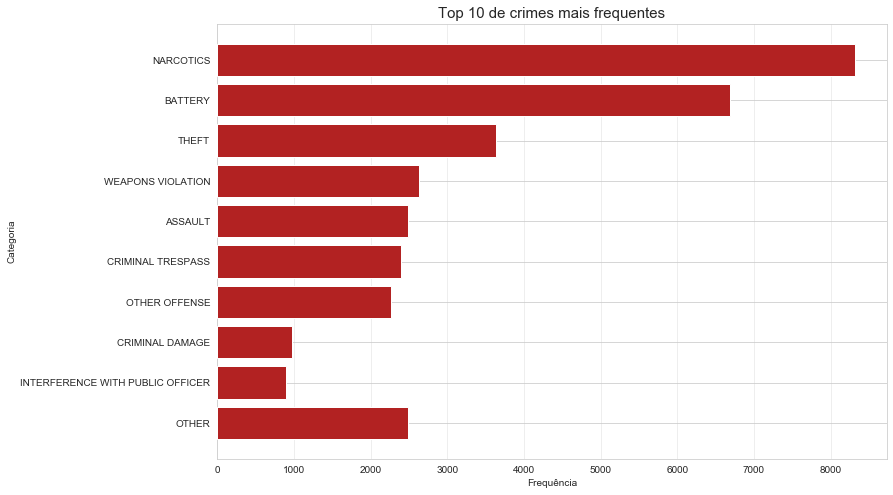

In [42]:
# Top 10 de crimes mais frequentes
## Buscar o top 10 de crimes
### Criar o top 10 para a categoria e acrescentar o valor "other"
primary_type = df["Primary_Type"]
primary_type = primary_type.value_counts()
categoria = list(primary_type.index)[0:9]
categoria.append("OTHER")

### Somar os restantes valores
other_counts = sum(list(primary_type.values)[10:])
other_counts

### Criar o top 10 para a frequencia de valores e associar a soma anterior com o valor "other"
frequencia = list(primary_type.values)[0:9]
frequencia.append(other_counts)

### Criar gráfico
plt.figure(figsize=(12, 8))
plt.barh(categoria, frequencia, color = "firebrick", zorder=3)
plt.gca().invert_yaxis()
plt.xlabel("Frequência")
plt.ylabel("Categoria")
plt.title("Top 10 de crimes mais frequentes", fontsize = 15)
plt.grid(axis = "x", alpha = 0.4, zorder=2)
plt.show()

<p> <b> Análise: </b></p>

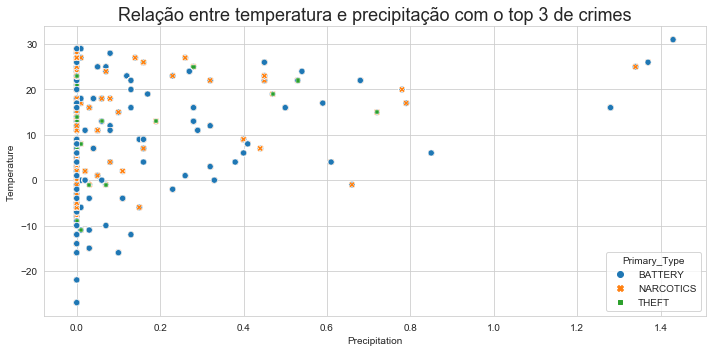

In [43]:
# Relação entre temperatura e precipitação com o top 3 de crimes
## Buscar dados dos crimes que estão no top 3
primary_type = df["Primary_Type"]
primary_type = primary_type.value_counts()
categoria = list(primary_type.index)[0:3]
data_categorias = df[df["Primary_Type"].isin(categoria)]

## Criar gráfico
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,1,1)
sea.scatterplot(data=data_categorias, x="Precipitation", y="Temperature", hue="Primary_Type", style="Primary_Type")
sea.set_style("whitegrid")
ax1.set_title('Relação entre temperatura e precipitação com o top 3 de crimes', fontsize=18)
fig.tight_layout()

In [7]:
Image("img/2.png")

<p> <b> Análise: </b></p>

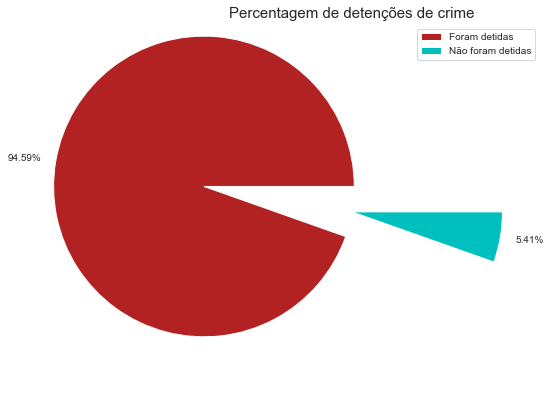

In [44]:
# Percentagem de detenções de crime
## Criar lista com a frequência de pessoas detidas + lista a dizer se foi ou não detida + lista com a percentagem de detenção + lista para legenda 
arrest = df["Arrest"]
arrest = arrest.value_counts()
bol = list(arrest.index)
frequencia =  list(arrest.values)
percentagem = [str(round(frequencia[0]/sum(frequencia)*100, 2)) + "%", str(round(frequencia[1]/sum(frequencia)*100, 2)) + "%"]
prisão = ["Foram detidas", "Não foram detidas"]


## Criar gráfico
figure = plt.figure(figsize=(20, 6))
figure.subplots_adjust(left=0.18, bottom=0.10, right=0.99, top=0.97)
axes = figure.add_subplot(111)
axes.pie(frequencia, bol, colors = ["firebrick", "c"], labels = percentagem)
axes.legend(prisão)
plt.title("Percentagem de detenções de crime", fontsize = 15)

plt.show()

<p> <b> Análise: </b></p>

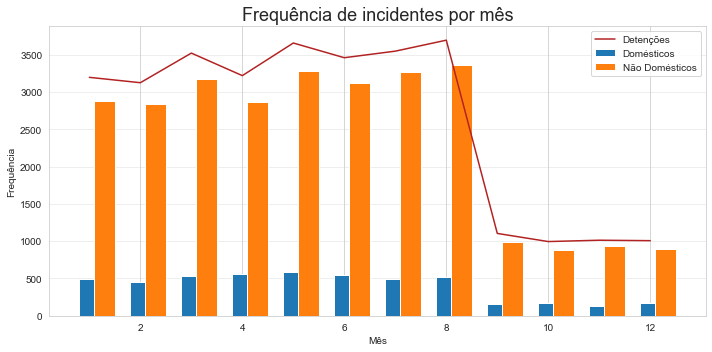

In [45]:
# Frequência de incidentes por mês
## Criar dataframe com contagens para cada mês e valor doméstico
race = df[["Month","Domestic", "ID"]]
race = race.groupby(["Month", "Domestic"]).count().reset_index()

## Criar lista com contagens para os incidentes que não são domésticos
race_false = race.loc[race['Domestic'] == False]


## Criar lista com contagens para os incidentes que são domésticos
race_true = race.loc[race['Domestic'] == True]

## Criar listas para gráfico - para o caso de ser True
meses = np.arange(len(list(race_false["Month"]))) + 1
domestic_true = list(race_true["Domestic"])
ID_true = list(race_true["ID"])

## Criar listas para gráfico - para o caso de ser False
domestic_false = list(race_false["Domestic"])
ID_false = list(race_false["ID"])

## Criar listas para gráfico - para os arrests
race2 = df[["Month","Arrest"]]
race2 = race2.loc[race2['Arrest'] == True]
race2 = race2.groupby(["Month"]).count().reset_index()
race2 = list(race2["Arrest"])
race2 = np.array(race2)

## Criar gráfico
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(meses + 0, ID_true, label = "Domésticos", width = 0.4, zorder=2)
ax1.bar(meses + 0.3, ID_false, label = "Não Domésticos", width = 0.4, zorder=2)
ax1.plot(meses, race2, label = "Detenções", color = "firebrick")
ax1.set_ylabel('Frequência')
ax1.set_title('Frequência de incidentes por mês', fontsize=18)
ax1.set_xlabel("Mês",  fontsize=10)
ax1.yaxis.grid(alpha = 0.4, zorder=2)
ax1.legend()
fig.tight_layout()
plt.show()

<p> <b> Análise: </b></p>

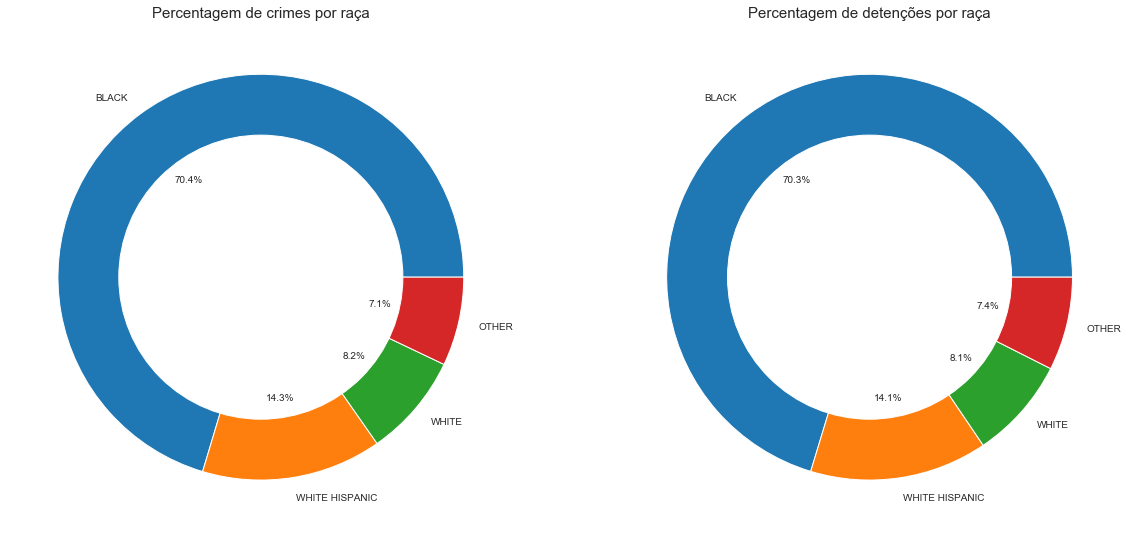

In [46]:
# Percentagem de crimes por Raça + Percentagem de detenções por Raça
## Criar  lista com top 3 de raças e somar o restante à lista com o valor "OTHER"
race = df["Race"]
race = race.value_counts()
race2 = list(race.index)[0:3]
race2.append("OTHER")
other_counts1 = sum(list(race.values)[3:])
frequencia1 =  list(race.values[0:3])
frequencia1.append(other_counts)
legenda1 = race2

## Criar  lista com top 3 de raças e somar o restante à lista com o valor "OTHER" (buscar apenas as detenções)
arrest = df[["Race", "Arrest"]]
arrest = arrest.loc[arrest['Arrest'] == True]
arrest = arrest["Race"]
arrest = arrest.value_counts()
arrest2 = list(race.index)[0:3]
arrest2.append("OTHER")
other_counts2 = sum(list(arrest.values)[3:])
frequencia2 =  list(arrest.values[0:3])
frequencia2.append(other_counts)
legenda2 = arrest2

## Criar gráfico
fig, axes = plt.subplots(1, 2, figsize = (20, 13))
axes[0].pie(frequencia1, labels = legenda1, autopct="%1.1f%%")
my_circle1=plt.Circle( (0,0), 0.7, color='white')
axes[0].add_artist(my_circle1)
axes[0].set_title("Percentagem de crimes por raça", fontsize = 15)

axes[1].pie(frequencia2, labels = legenda2, autopct="%1.1f%%")
my_circle2=plt.Circle( (0,0), 0.7, color='white')
axes[1].add_artist(my_circle2)
axes[1].set_title("Percentagem de detenções por raça", fontsize = 15)
plt.show()

<p> <b> Análise: </b></p>

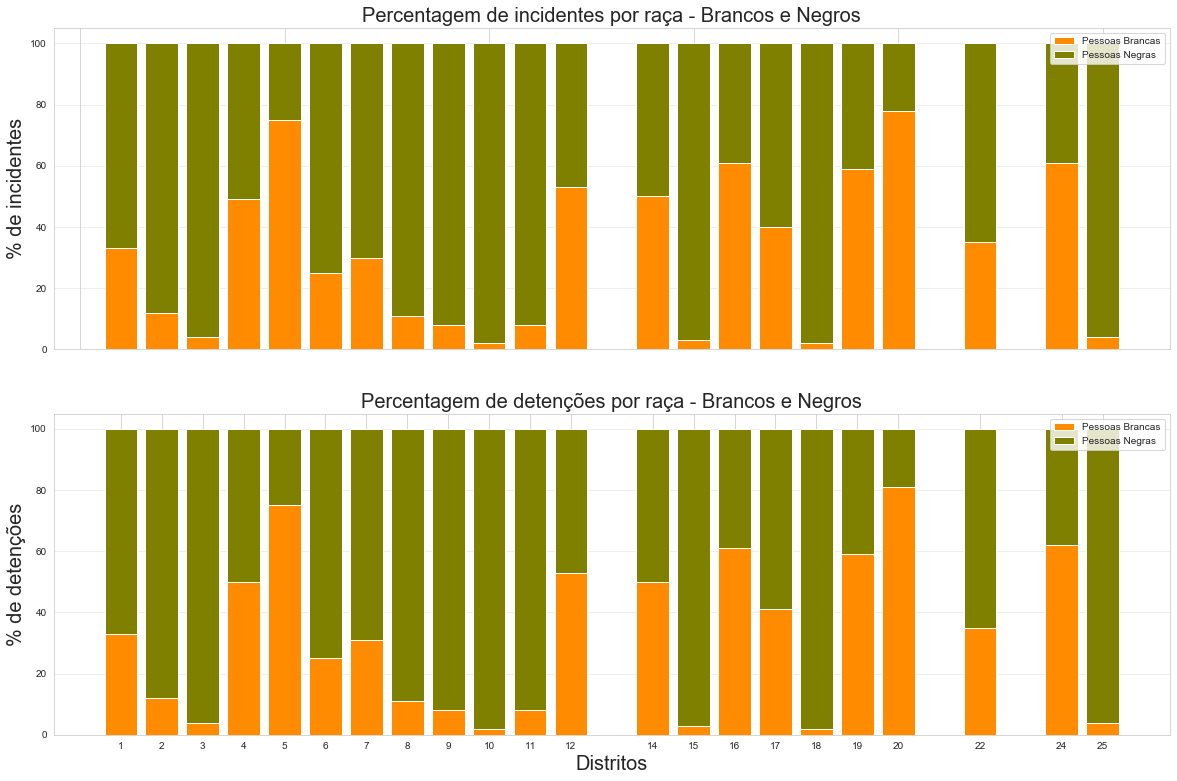

In [47]:
# Percentagem de incidentes e de detenções por raça - Brancos e Negros
## Informação para o primeiro gráfico - Percentagem de pessoas brancas e pretas associadas a incidentes por distrito
### Distritos
um_distritos = df["District"]
um_distritos = um_distritos.unique()
um_distritos

### Buscar quantidades de white e black por distrito 
um_distritos2 = df[["District", "Race"]]
um_distritos2 = um_distritos2[um_distritos2["Race"].isin(["WHITE", "WHITE HISPANIC", "BLACK"])]
um_distritos2 = um_distritos2.groupby(["District"]).count().reset_index()

### Pessoas Negras
um_p_negras = df[["District","Race"]]
um_p_negras = um_p_negras.loc[um_p_negras['Race'] == "BLACK"]
um_p_negras = um_p_negras.groupby(["District"]).count().reset_index()
um_p_negras = np.array(list(map(lambda x: round(x, 2) * 100, np.array(um_p_negras["Race"])/np.array(um_distritos2["Race"]))))

### Pessoas Brancas & Brancas Hispanic
um_p_brancas = df[["District","Race"]]
um_p_brancas = um_p_brancas[um_p_brancas["Race"].isin(["WHITE", "WHITE HISPANIC"])]
um_p_brancas = um_p_brancas.groupby(["District"]).count().reset_index()
um_p_brancas = np.array(list(map(lambda x: round(x, 2) * 100, np.array(um_p_brancas["Race"])/np.array(um_distritos2["Race"]))))

## Informação para o segundo gráfico - Percentagem de pessoas brancas e pretas associadas a detenções por distrito
### Distritos
dois_distritos = df["District"]
dois_distritos = dois_distritos.unique()
dois_distritos

### Buscar quantidades de white e black por distrito 
dois_distritos2 = df[["District", "Race", "Arrest"]]
dois_distritos2 = dois_distritos2.loc[dois_distritos2['Arrest'] == True]
dois_distritos2 = dois_distritos2[dois_distritos2["Race"].isin(["WHITE", "WHITE HISPANIC", "BLACK"])]
dois_distritos2 = dois_distritos2[["District", "Race"]]
dois_distritos2 = dois_distritos2.groupby(["District"]).count().reset_index()

### Pessoas Negras
dois_p_negras = df[["District","Race", "Arrest"]]
dois_p_negras = dois_p_negras.loc[dois_p_negras['Arrest'] == True]
dois_p_negras = dois_p_negras.loc[dois_p_negras['Race'] == "BLACK"]
dois_p_negras = dois_p_negras[["District", "Race"]]
dois_p_negras = dois_p_negras.groupby(["District"]).count().reset_index()
dois_p_negras = np.array(list(map(lambda x: round(x, 2) * 100, np.array(dois_p_negras["Race"])/np.array(dois_distritos2["Race"]))))

### Pessoas Brancas & Brancas Hispanic
dois_p_brancas = df[["District","Race", "Arrest"]]
dois_p_brancas = dois_p_brancas.loc[dois_p_brancas['Arrest'] == True]
dois_p_brancas = dois_p_brancas[dois_p_brancas["Race"].isin(["WHITE", "WHITE HISPANIC"])]
dois_p_brancas = dois_p_brancas[["District", "Race"]]
dois_p_brancas = dois_p_brancas.groupby(["District"]).count().reset_index()
dois_p_brancas = np.array(list(map(lambda x: round(x, 2) * 100, np.array(dois_p_brancas["Race"])/np.array(dois_distritos2["Race"]))))


## Criar gráfico
### Criar 1º figura
fig, axes = plt.subplots(2, 1, figsize = (20, 13))
axes[0].bar(um_distritos, um_p_brancas, label = "Pessoas Brancas", zorder = 3, align = "center", color = "darkorange")
axes[0].bar(um_distritos, um_p_negras, label = "Pessoas Negras", bottom = um_p_brancas, zorder = 3, align = "center", color = "Olive")
axes[0].set_ylabel('% de incidentes', fontsize=20)
axes[0].yaxis.grid(alpha = 0.4, zorder=2)
axes[0].legend()
axes[0].yaxis.grid(alpha = 0.4, zorder=2)
axes[0].set_title('Percentagem de incidentes por raça - Brancos e Negros', fontsize=20)
axes[0].set_xticklabels([])

### Criar 2º figura
axes[1].bar(dois_distritos, dois_p_brancas, label = "Pessoas Brancas", zorder = 3, align = "center", color = "darkorange")
axes[1].bar(dois_distritos, dois_p_negras, label = "Pessoas Negras", bottom = dois_p_brancas, zorder = 3, align = "center", color = "Olive")
axes[1].set_ylabel('% de detenções', fontsize=20)
axes[1].set_xlabel('Distritos', fontsize=20)
axes[1].yaxis.grid(alpha = 0.4, zorder=2)
axes[1].legend()
axes[1].set_title('Percentagem de detenções por raça - Brancos e Negros', fontsize=20)
plt.xticks(list(um_distritos))
plt.show()

<p> <b> Análise: </b></p>

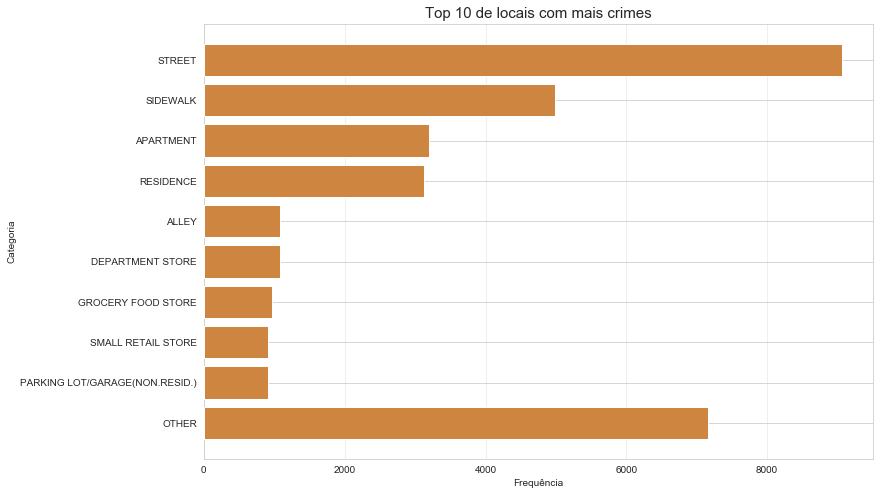

In [48]:
# Top 10 de locais com mais crime
## Buscar o top 10 de locais
### Criar o top 10 para a categoria e acrescentar o valor "other"
local_type = df["Location_Description"]
local_type = local_type.value_counts()
categoria = list(local_type.index)[0:9]
categoria.append("OTHER")

### Somar os restantes valores
other_counts = sum(list(local_type.values)[10:])
other_counts

### Criar o top 10 para a frequencia de valores e associar a soma anterior com o valor "other"
frequencia = list(local_type.values)[0:9]
frequencia.append(other_counts)
frequencia

### Criar gráfico
plt.figure(figsize=(12, 8))
plt.barh(categoria, frequencia, color = "peru", zorder=3)
plt.gca().invert_yaxis()
plt.xlabel("Frequência")
plt.ylabel("Categoria")
plt.title("Top 10 de locais com mais crimes", fontsize = 15)
plt.grid(axis = "x", alpha = 0.4, zorder=2)
plt.show()

<p> <b> Análise: </b></p>

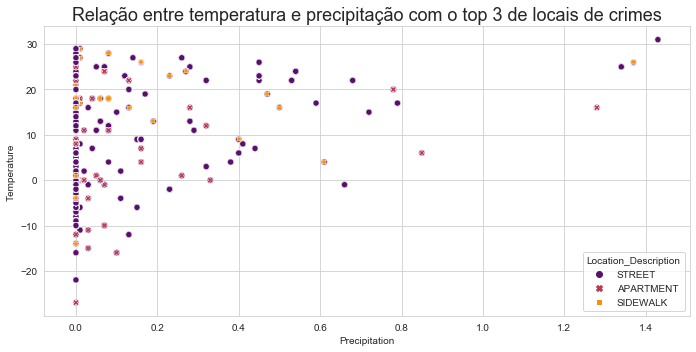

In [49]:
# Relação entre temperatura e precipitação com o top 3 de locais com mais crime
## Buscar dados dos dos locais de crimes que estão no top 3
local_type = df["Location_Description"]
local_type = local_type.value_counts()
categoria = list(local_type.index)[0:3]
data_categorias = df[df["Location_Description"].isin(categoria)]

## Criar gráfico
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,1,1)
sea.scatterplot(data=data_categorias, x="Precipitation", y="Temperature", hue="Location_Description", style="Location_Description", palette="inferno")
sea.set_style("whitegrid")
ax1.set_title('Relação entre temperatura e precipitação com o top 3 de locais de crimes', fontsize=18)
fig.tight_layout()

In [12]:
Image("img/8.png")

## 2 - Data Preparation ##

### Análise - Qualidade e Processamento dos dados ###

In [50]:
df.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Arrest.1,...,Day,Temperature,Precipitation,HOUR,HOUR_TIME,Date_Corrected,Time_Aux,Time_Aux.1,Time_Aux.2,Time_Corrected
0,11565100,JC114978,01/13/2019 12:28:00 AM,007XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,True,1,...,13,-1,0.07,0.0,AM,01/13/2019,12:28:00,AM,NaN,12:28:00
1,11565124,JC114991,01/13/2019 12:30:00 AM,050XX W ADAMS ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,True,1,...,13,-1,0.07,0.0,AM,01/13/2019,12:30:00,AM,NaN,12:30:00
2,11565114,JC114996,01/13/2019 12:45:00 AM,006XX N DEARBORN ST,460,BATTERY,SIMPLE,BAR OR TAVERN,True,1,...,13,-1,0.07,0.0,AM,01/13/2019,12:45:00,AM,NaN,12:45:00
3,11565383,JC115237,01/13/2019 01:00:00 AM,028XX W 71ST ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,0,...,13,-1,0.07,1.0,AM,01/13/2019,01:00:00,AM,NaN,01:00:00
4,11565204,JC115014,01/13/2019 01:09:00 AM,070XX S CHAPPEL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,True,1,...,13,-1,0.07,1.0,AM,01/13/2019,01:09:00,AM,NaN,01:09:00


C:\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot das horas do dia')

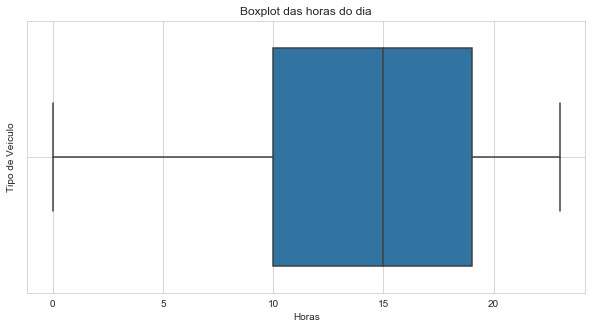

In [51]:
# 1 - Date without hours : diagrama de extremos e quartis, se tiver muitos outliers, usa-se a mediana, senão usa-se a média
## Tirar NAs da coluna
df_time_without_nas = df[df["Time_Corrected"] != "NA"]
df_time_without_nas = df_time_without_nas["Time_Corrected"]

## Buscar linhas do tipo datetime.time e datetime.datetime
df_time_without_nas_time = []
df_time_without_nas_datetime = []
resto = []
for x in df_time_without_nas:
    if type(x)==datetime.time:
        df_time_without_nas_time.append(x)
    elif type(x)==datetime.datetime:
        df_time_without_nas_datetime.append(x)
    else:
        resto.append(x)
## Buscar horas das linhas do tipo datetime.time      
df_time_without_nas_time2 = list(map(lambda x: x.hour, df_time_without_nas_time))

## Buscar horas das linhas do tipo datetime.datetime      
df_time_without_nas_datetime2 = list(map(lambda x: x.hour, df_time_without_nas_datetime))

## Juntar as duas listas com horas
df_alldate = df_time_without_nas_time2 + df_time_without_nas_datetime2

## Criar gráfico para verificar presença de outliers
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
sea.boxplot(df_alldate)
ax.set_xlabel("Horas")
ax.set_ylabel("Tipo de Veículo")
ax.yaxis.grid()
ax.set_title("Boxplot das horas do dia")

In [16]:
#Image("img/horas.png")

<p> <b> Análise: </b></p>

In [52]:
from datetime import datetime
## Como não existe outliers então vamos colocar a média das horas para as linhas que têm o valor NA
df_alldate_mean = round(statistics.mean(df_alldate))
df_alldate_mean # o valor é de 14

## Converter o valor 14 para time
datetime_str = '14:00:00'
datetime_object = datetime.strptime(datetime_str, '%H:%M:%S').time()

## Tendo a média em tipo time agora é substituir os valores NAs por esse tipo
df["Time_Corrected"] = df["Time_Corrected"].replace(["NA"], datetime_object)

## Prova de que não existe NAs
df_time_without_nas = df[df["Time_Corrected"] == "NA"]
df_time_without_nas

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Arrest.1,...,Day,Temperature,Precipitation,HOUR,HOUR_TIME,Date_Corrected,Time_Aux,Time_Aux.1,Time_Aux.2,Time_Corrected


C:\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


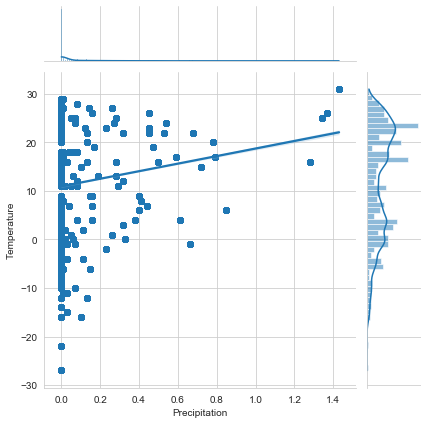

In [53]:
# 2- Scatterplots: temperatura vs precipitação
## Vai-se plotar a distribuição dos dois eixos e ver se está distorcido. Se estiver, tem-se que usar a transformação log (para interpretação apenas)+ estandardização
## Criar gráfico para ver a distribuição das variáveis "Temperatura" e "Precipitação" e ver possíveis outliers
sea.jointplot("Precipitation", "Temperature", df, kind = 'reg');

In [19]:
Image("img/prep_temp_outliers.png")

C:\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


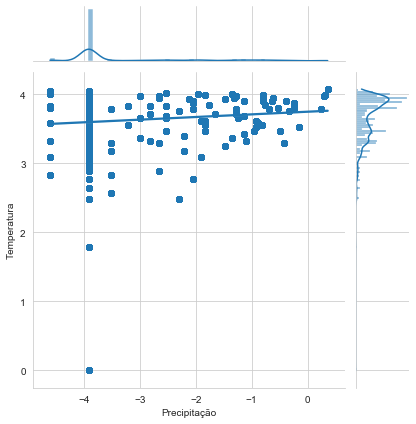

In [54]:
## Uma vez que os dados que são outliers são consistentes (ou seja não são dados aleatórios e a sua remoção teria implicações nos resultados) 
## não faz sentido estar a removê-los porque podem trazer informação valiosa para as previsões

## Desta forma vai-se utilizar a transformação logaritmica de forma a que se as variáveis forem dependentes
## então vai ajudar nas assunções e se não forem vai ajudar a diminuir o impacto dos outliersm (apenas para interpretação dos resultados)

## Uma vez que se tem valores a 0 e valores negativos é necessário corrigir isso
df2 = df
df2["Precipitation"] = df2["Precipitation"].replace([0.00], 0.02) # valores a 0 vai-se inflacionar um pouco
dados = pd.DataFrame({'Precipitação': list(np.log(df2["Precipitation"])),\
                      'Temperatura': list(np.log(df2["Temperature"] + 1 - min(df2["Temperature"])))}) # valores negativos vai-se utilizar a seguinte expressão "log(Y + 1 - min(Y))"

## Criar gráfico
sea.jointplot("Precipitação", "Temperatura", dados, kind = 'reg');

In [21]:
#Image("img/prep_temp_log.png")

In [55]:
## Percebe-se com o gráfico o menor impacto que os outliers tem na reta (mudou de inclinação) e melhorou a normalidade dos dados
## De seguida é colocar os valores em colunas novas respeitantes aos valores logaritmicos 

# Colocar na coluna da "Precipitação"
df["Precipitation_log"] = dados["Precipitação"]

# Colocar na coluna da "Temperature"
df["Temperature_log"] = dados["Temperatura"]

In [56]:
temperatura_norm = np.array(df["Temperature"])
precipitacao_norm = np.array(df["Precipitation"])

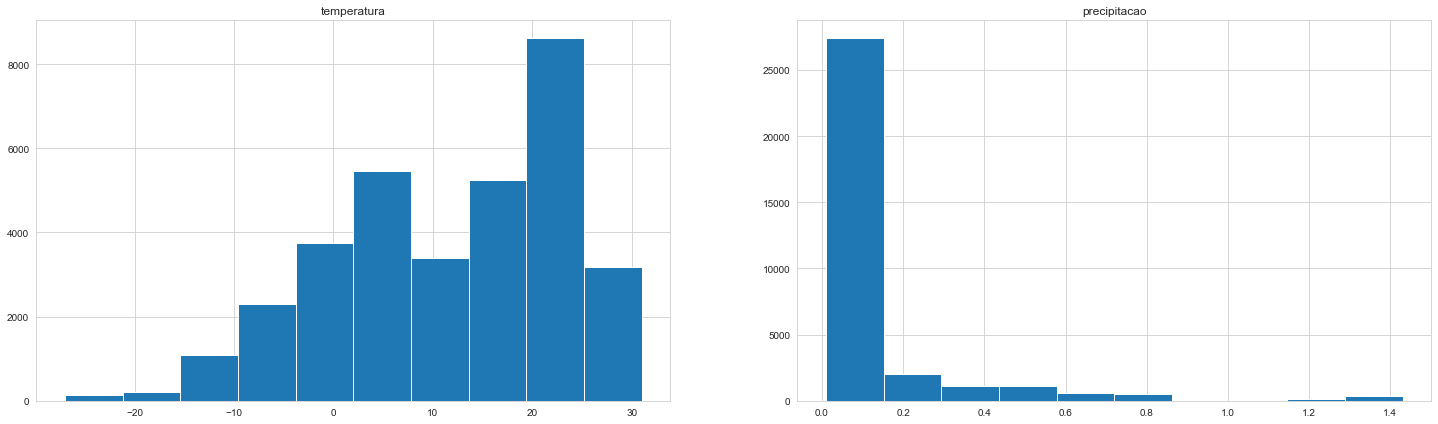

In [61]:
# 3 - Estandardizar: ((temperatura, precipitação))
## Passa-se a perceber a distribuição de cada variável acima

## Criar gráfico com as distribuições
fig, axes = plt.subplots(1, 2, figsize=(25,7))

axes[0].hist(temperatura_norm)
axes[0].set_title("temperatura")

axes[1].hist(precipitacao_norm)
axes[1].set_title("precipitacao")

plt.show()

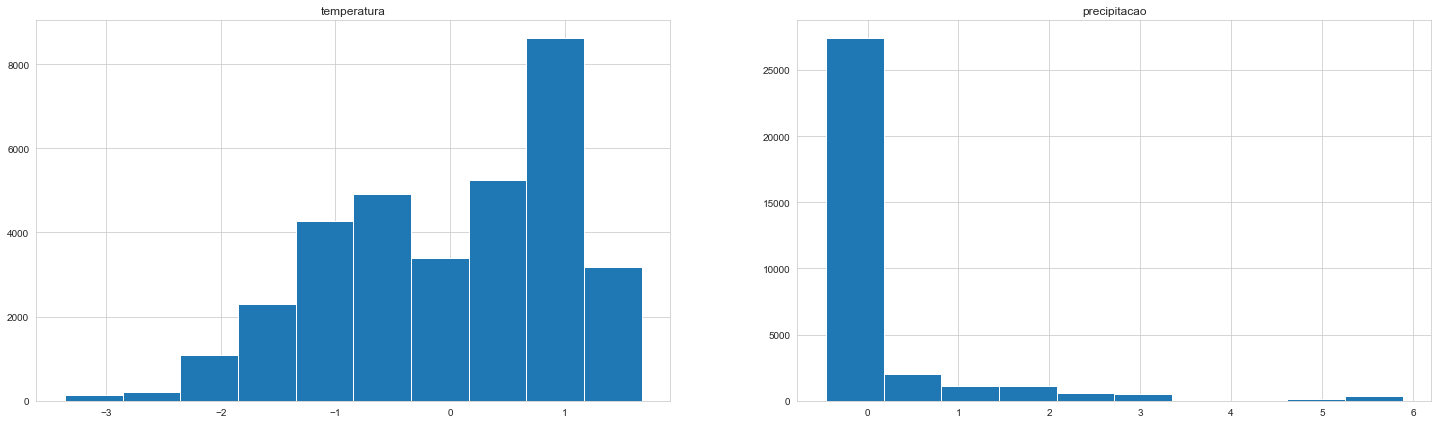

In [65]:
from sklearn.preprocessing import StandardScaler
## Uma vez que as distribuições são distorcidas passa-se à sua estandardização
##Estandardizar
### Get column names first
names1 = df[["Temperature", "Precipitation"]]
names2 = names1.columns

### Create the Scaler object
scaler = StandardScaler()
### Fit your data on the scaler object
scaled_df = scaler.fit_transform(names1)
scaled_df = pd.DataFrame(scaled_df, columns=names2)

### Criar colunas para o gráfico
scaled_df_temperature = list(scaled_df["Temperature"])
scaled_df_precipitation = list(scaled_df["Precipitation"])

## Criar gráfico com as distribuições estandardizadas
fig, axes = plt.subplots(1, 2, figsize=(25,7))

axes[0].hist(scaled_df_temperature)
axes[0].set_title("temperatura")

axes[1].hist(scaled_df_precipitation)
axes[1].set_title("precipitacao")

plt.show()

                #-- TESTE --#
### Criar objetos de imagem para se ler depois no gráfico
### temperature_img = Image.open("img/temperature_stand.png")
### precipitation_img = Image.open("img/precipitation_stand.png")

### Criar gráfico já com as variáveis estandardizadas
#fig, axes = plt.subplots(1, 2, figsize=(25,7))
#axes[0].imshow(temperature_img)
#axes[1].imshow(precipitation_img)
#axes[0].set_yticklabels([])
#axes[0].set_xticklabels([])
#axes[1].set_yticklabels([])
#axes[1].set_xticklabels([])
#plt.show()

In [68]:
### Por último falta acrescetar os novos valores das colunas

df["Precipitation"] = scaled_df["Precipitation"]
df["Temperature"] = scaled_df["Temperature"]

In [69]:
df.to_excel(r"C:\Python\MECD\IACEC\AllCrimeData3.0.xlsx")

In [475]:
df = pd.read_excel("AllCrimeData3.0.xlsx") # atenção que no excel foi retirado a coluna "Unnamed"
# que tinha sido criada automaticamente quando se criou o excel

In [476]:
df.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Arrest.1,...,Precipitation,HOUR,HOUR_TIME,Date_Corrected,Time_Aux,Time_Aux.1,Time_Aux.2,Time_Corrected,Precipitation_log,Temperature_log
0,11565100,JC114978,01/13/2019 12:28:00 AM,007XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,True,1,...,-0.188464,0.0,AM,01/13/2019,12:28:00,AM,NaN,12:28:00,-2.65926,3.295837
1,11565124,JC114991,01/13/2019 12:30:00 AM,050XX W ADAMS ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,True,1,...,-0.188464,0.0,AM,01/13/2019,12:30:00,AM,NaN,12:30:00,-2.65926,3.295837
2,11565114,JC114996,01/13/2019 12:45:00 AM,006XX N DEARBORN ST,460,BATTERY,SIMPLE,BAR OR TAVERN,True,1,...,-0.188464,0.0,AM,01/13/2019,12:45:00,AM,NaN,12:45:00,-2.65926,3.295837
3,11565383,JC115237,01/13/2019 01:00:00 AM,028XX W 71ST ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,0,...,-0.188464,1.0,AM,01/13/2019,01:00:00,AM,NaN,01:00:00,-2.65926,3.295837
4,11565204,JC115014,01/13/2019 01:09:00 AM,070XX S CHAPPEL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,True,1,...,-0.188464,1.0,AM,01/13/2019,01:09:00,AM,NaN,01:09:00,-2.65926,3.295837


In [477]:
# Uma vez que se viu que é importante a transformação logaritmica (para apenas interpretação) e a estandardização,
# então fazer-se-á o mesmo para as longitudes, latitudes e Distancia à policia
# Latidude_Corrected	Longitude_Corrected	Latitude_Police_Corrected	Longitude_Police_Corrected	Distance_Crime_Police
# Fazer correções nas colunas
df2 = df
Latidude_Corrected = []

for x in list(df2["Latidude_Corrected"]):
    if type(x) == str and x != "NA,":
        a = x.replace(",", ".")
        a = float(a)
        Latidude_Corrected.append(a)
    else:
        Latidude_Corrected.append(x)

Longitude_Corrected = []

for x in list(df2["Longitude_Corrected"]):
    if type(x) == str and x != "NA,":
        a = x.replace(",", ".")
        a = float(a)
        Longitude_Corrected.append(a)
    else:
        Longitude_Corrected.append(x)

Latitude_Police_Corrected = []

for x in list(df2["Latitude_Police_Corrected"]):
    if type(x) == str and x != "NA,":
        a = x.replace(",", ".")
        a = float(a)
        Latitude_Police_Corrected.append(a)
    else:
        Latitude_Police_Corrected.append(x)
        
        
Longitude_Police_Corrected = []

for x in list(df2["Longitude_Police_Corrected"]):
    if type(x) == str and x != "NA,":
        a = x.replace(",", ".")
        a = float(a)
        Longitude_Police_Corrected.append(a)
    else:
        Longitude_Police_Corrected.append(x)


In [478]:
# Definir dataframe com as colunas com os dados transformados        
dados = pd.DataFrame({'Latitude_Corrected': Latidude_Corrected,\
                     'Longitude_Corrected': Longitude_Corrected,\
                     'Latitude_Police_Corrected': Latitude_Police_Corrected,\
                     'Longitude_Police_Corrected': Longitude_Police_Corrected})

# Para remover os Na, para depois os remover com o drop
dados = dados.replace('NA,', np.nan)

In [479]:
# Testando os tamanhos se estão iguais
print(len(df["Latitude_Police_Corrected"]))
print(len(dados["Latitude_Police_Corrected"]))

33338
33338


In [480]:
# Atribuir os valores às colunas do dataframe inicial (tem todos o mesmo tipo de dados agora)
df["Latidude_Corrected"] = dados["Latitude_Corrected"]
df["Longitude_Corrected"] = dados["Longitude_Corrected"]
df["Latitude_Police_Corrected"] = dados["Latitude_Police_Corrected"]
df["Longitude_Police_Corrected"] = dados["Longitude_Police_Corrected"]

In [481]:
# Agora faz-se a remoção dos valores a nulo nessas colunas - optou-se desta forma
# porque não faz sentido fazer a média de coordenadas porque trará informação falsa

df.dropna(subset=['Latidude_Corrected'], inplace=True)
df.dropna(subset=['Longitude_Corrected'], inplace=True)
df.dropna(subset=['Latitude_Police_Corrected'], inplace=True)
df.dropna(subset=['Longitude_Police_Corrected'], inplace=True)

C:\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


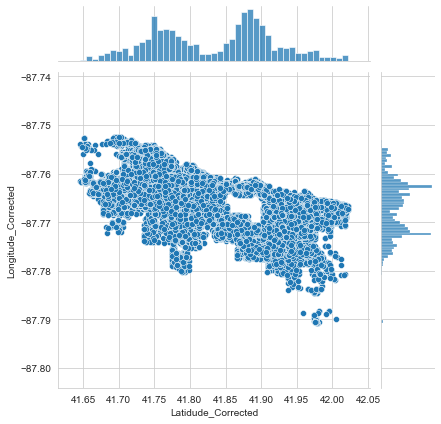

In [482]:
## Criar gráfico para apresentar distribuição das longitudes e latitudes dos crimes
## NOTA: reparar que como os valores não são muito dispersos não é preciso a escala logaritmica (porque existe interpretação)
sea.jointplot("Latidude_Corrected", "Longitude_Corrected", df);

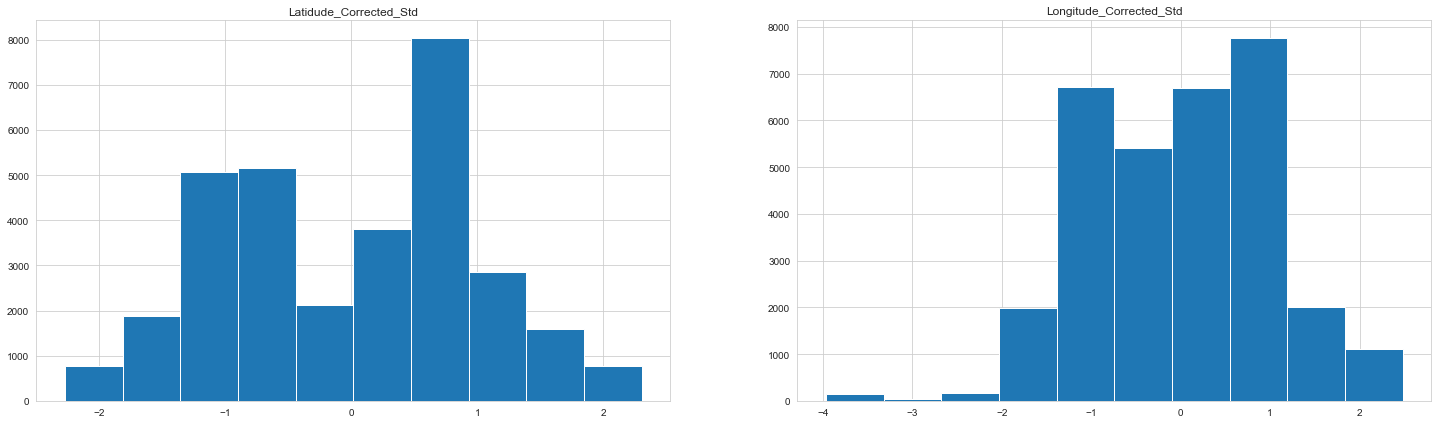

In [483]:
# Uma vez que a estandardização ajuda no processo de machine learning ao auxiliar o modelo a ver padrões
# nos dados, aqui também se fará esse processo mas criar-se-á variaveis novas para o efeito (isto deve-se
# porque quer-se as variáveis originais para o processo de treino e teste (plot), mas cria-se estas novas 
# como melhores formas de input para o modelo)

##Estandardizar
### Get column names first
names1 = df[["Latidude_Corrected", "Longitude_Corrected"]]
names2 = names1.columns

### Create the Scaler object
scaler = StandardScaler()
### Fit your data on the scaler object
scaled_df = scaler.fit_transform(names1)
scaled_df = pd.DataFrame(scaled_df, columns=names2)

### Criar colunas para o gráfico
scaled_df_Latidude_Corrected = list(scaled_df["Latidude_Corrected"])
scaled_df_Longitude_Corrected = list(scaled_df["Longitude_Corrected"])

## Criar gráfico com as distribuições estandardizadas
fig, axes = plt.subplots(1, 2, figsize=(25,7))

axes[0].hist(scaled_df_Latidude_Corrected)
axes[0].set_title("Latidude_Corrected_Std")

axes[1].hist(scaled_df_Longitude_Corrected)
axes[1].set_title("Longitude_Corrected_Std")

plt.show()


In [484]:
# Testando cumprimento das colunas para ver se bate certo
print(len(scaled_df_Latidude_Corrected))
print(len(df["Latidude_Corrected"]))

32030
32030


In [485]:
# Por último falta acrescetar os valores das colunas novas
df["Latidude_Corrected_Std"] = scaled_df_Latidude_Corrected
df["Longitude_Corrected_Std"] = scaled_df_Longitude_Corrected

C:\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


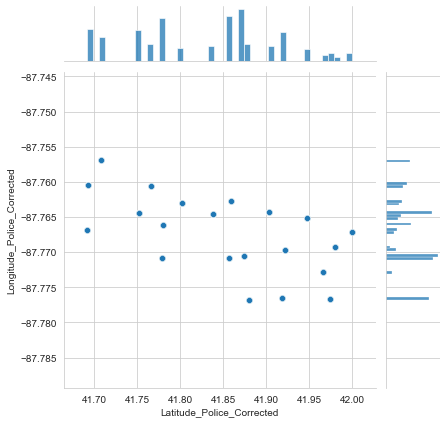

In [487]:
# Falta agora fazer o mesmo processo para as latitudes e longitudes da policia
## Criar gráfico para apresentar distribuição das longitudes e latitudes da policia
## NOTA: reparar que como os valores não são muito dispersos não é preciso a escala logaritmica (porque existe interpretação)
sea.jointplot("Latitude_Police_Corrected", "Longitude_Police_Corrected", df);


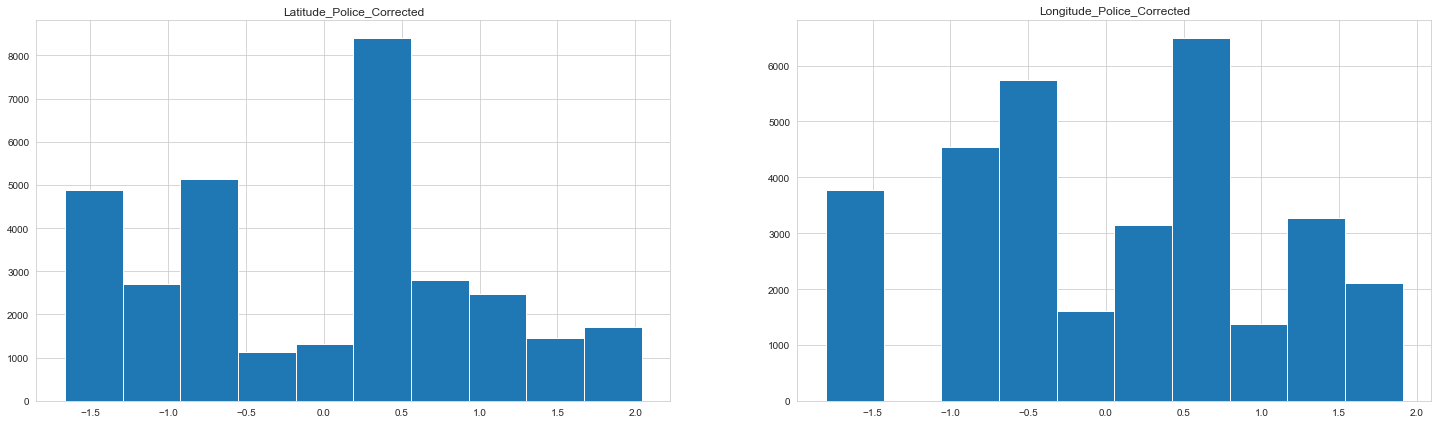

In [488]:
##Estandardizar
### Get column names first
names1 = df[["Latitude_Police_Corrected", "Longitude_Police_Corrected"]]
names2 = names1.columns

### Create the Scaler object
scaler = StandardScaler()
### Fit your data on the scaler object
scaled_df = scaler.fit_transform(names1)
scaled_df = pd.DataFrame(scaled_df, columns=names2)

### Criar colunas para o gráfico
scaled_df_Latitude_Police_Corrected = list(scaled_df["Latitude_Police_Corrected"])
scaled_df_Longitude_Police_Corrected = list(scaled_df["Longitude_Police_Corrected"])

## Criar gráfico com as distribuições estandardizadas
fig, axes = plt.subplots(1, 2, figsize=(25,7))

axes[0].hist(scaled_df_Latitude_Police_Corrected)
axes[0].set_title("Latitude_Police_Corrected")

axes[1].hist(scaled_df_Longitude_Police_Corrected)
axes[1].set_title("Longitude_Police_Corrected")

plt.show()

In [489]:
# Por último falta acrescentar os novos valores das colunas (neste caso pretende-se mesmo rescrever os valores)
# isto porque não se precisa das variaveis originais para o plot ou treino e teste
df["Latitude_Police_Corrected"] = scaled_df_Latitude_Police_Corrected
df["Longitude_Police_Corrected"] = scaled_df_Longitude_Police_Corrected

In [491]:
# Escrever o ficheiro para a versão 3.1
df.to_excel(r"C:\Python\MECD\IACEC\AllCrimeData3.1.xlsx")

In [519]:
df = pd.read_excel("AllCrimeData3.1.xlsx") # atenção que no excel foi retirado a coluna "Unnamed"
# que tinha sido criada automaticamente quando se criou o excel
df

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Arrest.1,...,HOUR_TIME,Date_Corrected,Time_Aux,Time_Aux.1,Time_Aux.2,Time_Corrected,Precipitation_log,Temperature_log,Latidude_Corrected_Std,Longitude_Corrected_Std
0,11565100,JC114978,01/13/2019 12:28:00 AM,007XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,True,1,...,AM,01/13/2019,12:28:00,AM,NaN,12:28:00,-2.659260,3.295837,-1.167331,0.508636
1,11565124,JC114991,01/13/2019 12:30:00 AM,050XX W ADAMS ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,True,1,...,AM,01/13/2019,12:30:00,AM,NaN,12:30:00,-2.659260,3.295837,0.556527,-1.358775
2,11565114,JC114996,01/13/2019 12:45:00 AM,006XX N DEARBORN ST,460,BATTERY,SIMPLE,BAR OR TAVERN,True,1,...,AM,01/13/2019,12:45:00,AM,NaN,12:45:00,-2.659260,3.295837,0.738828,0.706005
3,11565383,JC115237,01/13/2019 01:00:00 AM,028XX W 71ST ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,0,...,AM,01/13/2019,01:00:00,AM,NaN,01:00:00,-2.659260,3.295837,-0.825275,-0.388801
4,11565204,JC115014,01/13/2019 01:09:00 AM,070XX S CHAPPEL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,True,1,...,AM,01/13/2019,01:09:00,AM,NaN,01:09:00,-2.659260,3.295837,-0.797033,1.628746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32025,11792863,JC390724,2019-12-08T23:00:00,133XX S CALUMET AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,1,...,PM,2019-12-08 00:00:00,23:00:00,NaN,NaN,23:00:00,-3.912023,3.526361,-2.174471,0.970850
32026,11792289,JC390155,2019-12-08T23:07:00,007XX S KILPATRICK AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,1,...,PM,2019-12-08 00:00:00,23:07:00,NaN,NaN,23:07:00,-3.912023,3.526361,0.466104,-1.195145
32027,11792344,JC390180,2019-12-08T23:23:00,048XX W HENDERSON ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,1,...,PM,2019-12-08 00:00:00,23:23:00,NaN,NaN,23:23:00,-3.912023,3.526361,1.320760,-1.286238
32028,11792334,JC390191,2019-12-08T23:45:00,039XX W ROOSEVELT RD,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,STREET,True,1,...,PM,2019-12-08 00:00:00,23:45:00,NaN,NaN,23:45:00,-3.912023,3.526361,0.407196,-0.889814


In [520]:
# APARTE: A coluna Time_Corrected e HOUR em certos casos não tinha valores
from datetime import datetime

## Calculandio a média
Time_Corrected_Out_Nas = [str(x)[0:2] for x in df.Time_Corrected if x is not None]
Time_Corrected_Out_Nas2 = [int(x) for x in Time_Corrected_Out_Nas if x != "na"]
Time_Corrected_Corrected_Mean = round(statistics.mean(Time_Corrected_Out_Nas2))
Time_Corrected_Corrected_Mean # a média das horas são 14:00:00

## Variável com a média
datetime_str = '14:00:00'
datetime_str_hour = 14

## Tendo a média em tipo time agora é substituir os valores a vazio por esse tipo
df["Time_Corrected"] = df["Time_Corrected"].fillna(datetime_str)
df["HOUR"] = df["HOUR"].fillna(datetime_str_hour)

## Colocar os valores todos em datetime 
df["Time_Corrected"] = [datetime.strptime(x, '%H:%M:%S').time() for x in df["Time_Corrected"]]


In [521]:
## Prova de que não existe NAs ou valores vazios na coluna
df_time_without_nas = [type(x) for x in df["Time_Corrected"] if x == "na" or x == " "]
df_time_without_nas

[]

In [522]:
# 4 4 - Redução da dimensionalidade 
## De forma a reduzir a dimensionalidade vai-se usar 2 exemplos de filter: o pearson e spearman. No final escolheremos as colunas
## mais indicadas paras as targets

## Correlação de Pearson
pearson_data = df.iloc[:, [1, 3, 5, 6, 7, 9, 11, 12, 13, 14, 15, 18, 20, 22, 24, 25, 26, 28, 29, 30, 31, 32, 34, 38, 41, 42]]
pearson = pearson_data.corr(method='pearson')
pearson

,Arrest.1,Domestic.1,Beat,District,Ward,Community_Area,Latidude_Corrected,Longitude_Corrected,Latitude_Police_Corrected,Longitude_Police_Corrected,Distance_Crime_Police,Month,Day,Temperature,Precipitation,HOUR,Latidude_Corrected_Std,Longitude_Corrected_Std
Arrest.1,1.000000,-0.028114,-0.066850,-0.066795,-0.052850,0.048985,-0.069016,0.038006,-0.072850,0.042866,0.012102,0.001828,-0.004299,0.001033,-0.002940,0.021002,-0.069016,0.038006
Domestic.1,-0.028114,1.000000,-0.003198,-0.003257,-0.049772,0.072832,-0.067830,0.018452,-0.061074,0.005700,0.019475,-0.005420,0.012027,-0.002046,-0.006234,-0.028332,-0.067830,0.018452
Beat,-0.066850,-0.003198,1.000000,0.999826,0.621996,-0.475210,0.619703,-0.552310,0.634655,-0.632842,-0.152550,-0.001422,0.001521,0.000633,0.000604,-0.017683,0.619703,-0.552310
District,-0.066795,-0.003257,0.999826,1.000000,0.623756,-0.476053,0.620906,-0.553206,0.634526,-0.632542,-0.151693,-0.001648,0.001697,0.000442,0.000571,-0.017591,0.620906,-0.553206
Ward,-0.052850,-0.049772,0.621996,0.623756,1.000000,-0.518318,0.655909,-0.511941,0.643497,-0.486047,-0.110096,-0.003558,-0.001134,-0.000998,0.008603,-0.016937,0.655909,-0.511941
Community_Area,0.048985,0.072832,-0.475210,-0.476053,-0.518318,1.000000,-0.774308,0.305921,-0.746675,0.349702,0.117066,0.001742,0.000771,0.006167,-0.001410,0.025587,-0.774308,0.305921
Latidude_Corrected,-0.069016,-0.067830,0.619703,0.620906,0.655909,-0.774308,1.000000,-0.604335,0.979887,-0.623532,-0.189706,-0.004406,-0.002855,-0.007421,0.002445,-0.030318,1.000000,-0.604335
Longitude_Corrected,0.038006,0.018452,-0.552310,-0.553206,-0.511941,0.305921,-0.604335,1.000000,-0.627926,0.931454,0.240153,0.007150,0.001738,0.011116,-0.001643,-0.000875,-0.604335,1.000000
Latitude_Police_Corrected,-0.072850,-0.061074,0.634655,0.634526,0.643497,-0.746675,0.979887,-0.627926,1.000000,-0.652793,-0.242516,-0.002389,-0.003068,-0.005156,0.001437,-0.032859,0.979887,-0.627926
Longitude_Police_Corrected,0.042866,0.005700,-0.632842,-0.632542,-0.486047,0.349702,-0.623532,0.931454,-0.652793,1.000000,0.300780,0.006442,-0.001062,0.008337,0.000468,0.003251,-0.623532,0.931454


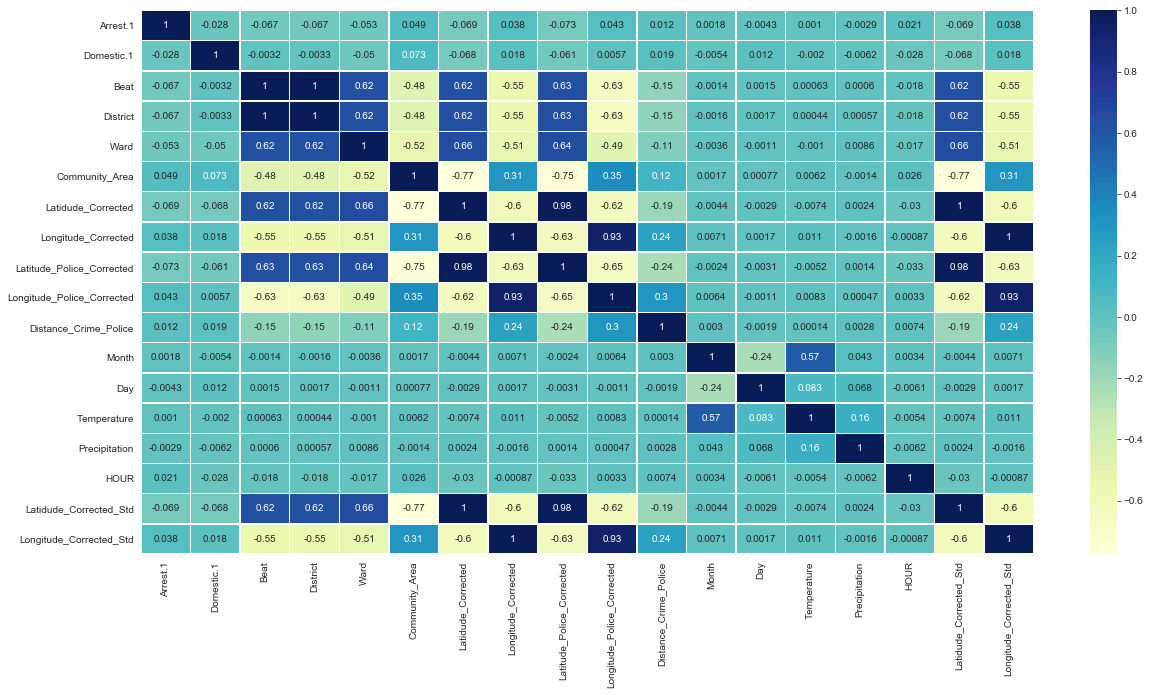

In [523]:
## De forma a ilustrar as correlações faz-se um gráfico

fig = plt.figure(figsize = (20, 10))
sea.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5)

In [525]:
## Correlação de Spearman

spearman_data = df.iloc[:, [1, 3, 5, 6, 7, 9, 11, 12, 13, 14, 15, 18, 20, 22, 24, 25, 26, 28, 29, 30, 31, 32, 34, 38, 41, 42]]
spearman = spearman_data.corr(method='spearman')
spearman

,Arrest.1,Domestic.1,Beat,District,Ward,Community_Area,Latidude_Corrected,Longitude_Corrected,Latitude_Police_Corrected,Longitude_Police_Corrected,Distance_Crime_Police,Month,Day,Temperature,Precipitation,HOUR,Latidude_Corrected_Std,Longitude_Corrected_Std
Arrest.1,1.000000,-0.028114,-0.059635,-0.059948,-0.050320,0.056690,-0.071670,0.036345,-0.074568,0.037917,0.003481,0.001834,-0.004635,-0.000291,-0.002883,0.021405,-0.071670,0.036345
Domestic.1,-0.028114,1.000000,-0.021569,-0.021877,-0.050085,0.066499,-0.067490,0.016931,-0.063162,-0.004677,0.010364,-0.006524,0.012445,-0.003220,0.005368,-0.027025,-0.067490,0.016931
Beat,-0.059635,-0.021569,1.000000,0.997240,0.641635,-0.583335,0.675667,-0.671239,0.706815,-0.689842,-0.143743,0.001846,-0.000320,-0.000479,-0.004461,-0.010544,0.675667,-0.671239
District,-0.059948,-0.021877,0.997240,1.000000,0.650673,-0.587651,0.685707,-0.681986,0.708578,-0.691675,-0.132029,0.000538,0.000064,-0.001279,-0.004818,-0.010161,0.685707,-0.681986
Ward,-0.050320,-0.050085,0.641635,0.650673,1.000000,-0.555679,0.641439,-0.558262,0.629940,-0.481816,-0.030308,-0.003863,-0.000880,-0.002127,0.005132,-0.013166,0.641439,-0.558262
Community_Area,0.056690,0.066499,-0.583335,-0.587651,-0.555679,1.000000,-0.827104,0.412941,-0.820682,0.363391,0.056849,0.001756,0.000249,0.004991,0.000604,0.023153,-0.827104,0.412941
Latidude_Corrected,-0.071670,-0.067490,0.675667,0.685707,0.641439,-0.827104,1.000000,-0.601455,0.980308,-0.561881,-0.081176,-0.004382,-0.003341,-0.006419,-0.000794,-0.029001,1.000000,-0.601455
Longitude_Corrected,0.036345,0.016931,-0.671239,-0.681986,-0.558262,0.412941,-0.601455,1.000000,-0.621248,0.930551,0.151604,0.007999,0.000268,0.012114,0.005202,-0.002433,-0.601455,1.000000
Latitude_Police_Corrected,-0.074568,-0.063162,0.706815,0.708578,0.629940,-0.820682,0.980308,-0.621248,1.000000,-0.586991,-0.141605,-0.001627,-0.003146,-0.004060,-0.000861,-0.028672,0.980308,-0.621248
Longitude_Police_Corrected,0.037917,-0.004677,-0.689842,-0.691675,-0.481816,0.363391,-0.561881,0.930551,-0.586991,1.000000,0.190171,0.004324,-0.000331,0.007372,0.004805,0.002946,-0.561881,0.930551


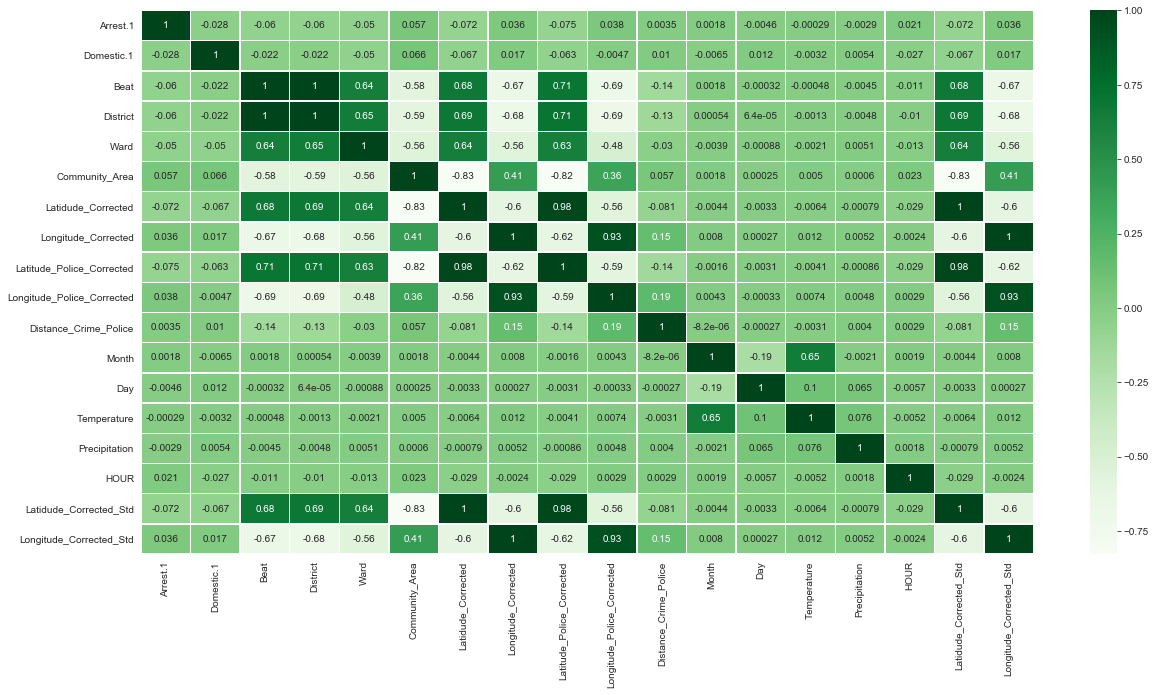

In [526]:
## De forma a ilustrar o as correlações faz-se um gráfico
fig = plt.figure(figsize = (20, 10))
sea.heatmap(spearman, 
            xticklabels=spearman.columns,
            yticklabels=spearman.columns,
            cmap='Greens',
            annot=True,
            linewidth=0.5)

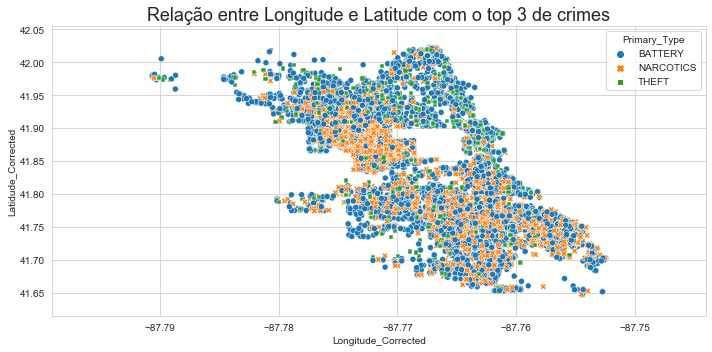

In [527]:
####--APARTE --####

# Relação entre Longitude e Latitude com o top 3 de crimes - não se fez antes porque as colunas não estavam tratadas e
# não se conseguia fazer o gráfico
## Buscar dados dos crimes que estão no top 3
primary_type = df["Primary_Type"]
primary_type = primary_type.value_counts()
categoria = list(primary_type.index)[0:3]
data_categorias = df[df["Primary_Type"].isin(categoria)]

## Criar gráfico
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,1,1)
sea.scatterplot(data=data_categorias, x="Longitude_Corrected", y="Latidude_Corrected", hue="Primary_Type", style="Primary_Type")
#sea.set_style("whitegrid")
ax1.set_title('Relação entre Longitude e Latitude com o top 3 de crimes', fontsize=18)
fig.tight_layout()

In [528]:
# Antes de se passar para a modelação fazer uma última verificação - CHECKUP
# Verificando se existem valores nulos
df2 = df.iloc[:, [1, 3, 5, 6, 7, 9, 11, 12, 13, 14, 15, 18, 20, 22, 24, 25, 26, 28, 29, 30, 31, 32, 34, 38, 41, 42]]
df2.isnull().values.any()

True

In [529]:
# Ver onde está o valor a missing
df2.isnull().sum()

Case_Number                   0
Block                         0
Primary_Type                  0
Description                   0
Location_Description          0
Arrest.1                      0
Domestic.1                    0
Beat                          0
District                      0
Ward                          1
Community_Area                0
Latidude_Corrected            0
Longitude_Corrected           0
Latitude_Police_Corrected     0
Longitude_Police_Corrected    0
Distance_Crime_Police         0
Race                          0
Month                         0
Day                           0
Temperature                   0
Precipitation                 0
HOUR                          0
Date_Corrected                0
Time_Corrected                0
Latidude_Corrected_Std        0
Longitude_Corrected_Std       0
dtype: int64

In [530]:
# Corrigir o valor a missing na coluna Ward - uma vez que a coluna Ward é uma variável qualitativa (é um número mas
# representa um distrito), então irá se substituir pela moda 
df2['Ward'] = df['Ward'].fillna(df['Ward'].mode()[0])
df2.isnull().sum()

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Case_Number                   0
Block                         0
Primary_Type                  0
Description                   0
Location_Description          0
Arrest.1                      0
Domestic.1                    0
Beat                          0
District                      0
Ward                          0
Community_Area                0
Latidude_Corrected            0
Longitude_Corrected           0
Latitude_Police_Corrected     0
Longitude_Police_Corrected    0
Distance_Crime_Police         0
Race                          0
Month                         0
Day                           0
Temperature                   0
Precipitation                 0
HOUR                          0
Date_Corrected                0
Time_Corrected                0
Latidude_Corrected_Std        0
Longitude_Corrected_Std       0
dtype: int64

In [531]:
# Escrever o ficheiro para a versão 3.1.1
df2.to_excel(r"C:\Python\MECD\IACEC\AllCrimeData3.1.1.xlsx")

In [11]:
df = pd.read_excel("AllCrimeData3.1.1.xlsx") # atenção que no excel foi retirado a coluna "Unnamed"
# que tinha sido criada automaticamente quando se criou o excel

### Análise - Deteção de Outliers e Tratamento ###

##### a) Outliers - Univariado #####

In [12]:
df.head()

,Case_Number,Block,Primary_Type,Description,Location_Description,Arrest.1,Domestic.1,Beat,District,Ward,...,Race,Month,Day,Temperature,Precipitation,HOUR,Date_Corrected,Time_Corrected,Latidude_Corrected_Std,Longitude_Corrected_Std
0,JC114978,007XX W 87TH ST,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,1,1,622,6,21,...,BLACK,1,13,-1.103892,-0.188464,0,01/13/2019,12:28:00,-1.167331,0.508636
1,JC114991,050XX W ADAMS ST,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,1,1,1533,15,28,...,WHITE HISPANIC,1,13,-1.103892,-0.188464,0,01/13/2019,12:30:00,0.556527,-1.358775
2,JC114996,006XX N DEARBORN ST,BATTERY,SIMPLE,BAR OR TAVERN,1,0,1832,18,42,...,WHITE,1,13,-1.103892,-0.188464,0,01/13/2019,12:45:00,0.738828,0.706005
3,JC115237,028XX W 71ST ST,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,0,1,831,8,18,...,BLACK,1,13,-1.103892,-0.188464,1,01/13/2019,01:00:00,-0.825275,-0.388801
4,JC115014,070XX S CHAPPEL AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,1,0,331,3,5,...,BLACK,1,13,-1.103892,-0.188464,1,01/13/2019,01:09:00,-0.797033,1.628746


Text(0.5, 0, 'Distance_Crime_Police')

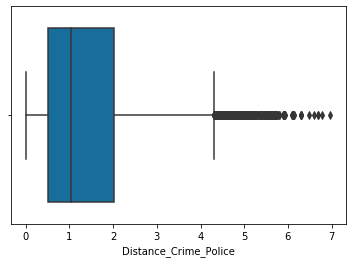

In [13]:
# De uma forma geral irá-se tratar dos outliers das seguintes variáveis quantitativas: Distância; Precipitação
# e Temperatura

## Distância à Policia
#Image("img\outliers_distancia.png")        
ax = sea.boxplot(x="Distance_Crime_Police", data=df, palette="colorblind")
ax.set_xlabel('Distance_Crime_Police')

Text(0.5, 0, 'Distance_Crime_Police')

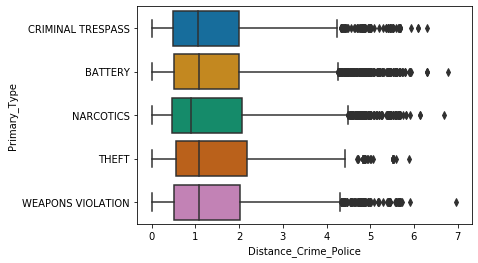

In [15]:
## Uma vez que se considerou esta variavel como possível variavel importante para a ocorrência de um crime 
## ou não, importa saber os outliers da distancia para cada tipo de crime e assim
#Image("img\Distancia_Tpo5_Policia.png")
lista = ["CRIMINAL TRESPASS", "BATTERY", "NARCOTICS", "THEFT", "WEAPONS VIOLATION"]
df2 = df.loc[df['Primary_Type'].isin(lista)]           
ax = sea.boxplot(x="Distance_Crime_Police", y="Primary_Type", data=df2, palette="colorblind")
ax.set_xlabel('Distance_Crime_Police')

In [17]:
##fiquei a fazer este teste (ver passo a passo)
for i in df.Primary_Type.unique().tolist():
    dados_i = df[df["Primary_Type"]==i]
    break
dados_i

,Case_Number,Block,Primary_Type,Description,Location_Description,Arrest.1,Domestic.1,Beat,District,Ward,...,Race,Month,Day,Temperature,Precipitation,HOUR,Date_Corrected,Time_Corrected,Latidude_Corrected_Std,Longitude_Corrected_Std
0,JC114978,007XX W 87TH ST,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,1,1,622,6,21,...,BLACK,1,13,-1.103892,-0.188464,0,01/13/2019,12:28:00,-1.167331,0.508636
20,JC121373,075XX N SHERIDAN RD,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,0,1,2422,24,49,...,WHITE,1,13,-1.103892,-0.188464,9,01/13/2019,09:00:00,2.254689,0.097030
43,JC115472,072XX S EAST END AVE,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,1,324,3,7,...,BLACK,1,13,-1.103892,-0.188464,2,01/13/2019,14:00:00,-0.836305,1.483672
59,JC115689,023XX E 95TH ST,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,1,0,431,4,7,...,BLACK,1,13,-1.103892,-0.188464,5,01/13/2019,17:10:00,-1.333511,1.763699
63,JC115737,001XX E 103RD ST,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,1,0,511,5,9,...,BLACK,1,13,-1.103892,-0.188464,5,01/13/2019,17:57:00,-1.519569,0.876383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31901,JC397712,051XX S DORCHESTER AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,0,1,234,2,4,...,BLACK,12,7,-0.930586,-0.411743,10,2019-12-07 00:00:00,22:00:00,-0.370129,1.345345
31916,JC388800,049XX W VAN BUREN ST,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,1,1,1533,15,29,...,BLACK,12,8,-0.497322,-0.411743,0,2019-12-08 00:00:00,00:18:00,0.513255,-1.291299
31973,JC389595,052XX W DEMING PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,0,1,2515,25,31,...,BLACK,12,8,-0.497322,-0.411743,3,2019-12-08 00:00:00,15:54:00,1.142581,-1.449869
31978,JC389798,036XX W CHICAGO AVE,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,VEHICLE NON-COMMERCIAL,0,0,1112,11,27,...,BLACK,12,8,-0.497322,-0.411743,5,2019-12-08 00:00:00,17:44:00,0.761979,-0.759922


In [8]:
## Exposto isto, importa pegar nesses outliers e substituir pela mediana
## (tendo em conta a distancia e o crime)
lista = []
for i in df.Primary_Type.unique().tolist():
    dados_i = df[df["Primary_Type"]==i]
    first_quartil = dados_i['Distance_Crime_Police'].quantile(0.25) # 25% quartil
    second_quartil = dados_i['Distance_Crime_Police'].quantile(0.75) # 75% quartil
    m_i = np.median(dados_i.Distance_Crime_Police)
    for x in dados_i.Distance_Crime_Police.tolist():
        if (x <= first_quartil) or (x >= second_quartil):
            a = m_i
            lista.append(a)
        else:
            lista.append(x)
df["Distance_Crime_Police"] = lista
    
    
    
    #df["Distance_Crime_Police"] = np.where((df.Primary_Type==i)&\
     #                                      ((df.Distance_Crime_Police<=first_quartil)|(df.Distance_Crime_Police>=second_quartil)),\
      #                                     m_i, df.Distance_Crime_Police).tolist()

In [394]:
#df.loc[:100,["Distance_Crime_Police", "Distance_Crime_Police2"]]


In [403]:
#df.Primary_Type.unique().tolist()
a = df.loc[df["Primary_Type"]=="CRIMINAL TRESPASS"]
m_i = np.median(a.Distance_Crime_Police)
m_i

1.070810493651678

In [148]:
#[x for x in np.where((df.Primary_Type=="CRIMINAL TRESPASS")&(df.Distance_Crime_Police<=first_quartil),m_i, df.Distance_Crime_Police)]

In [387]:
a = df.loc[df["Primary_Type"]=="CRIMINAL TRESPASS"]
#[x for x in a["Distance_Crime_Police"]]
#a["Distance_Crime_Police2"].unique().tolist()

Text(0.5, 0, 'Distance_Crime_Police')

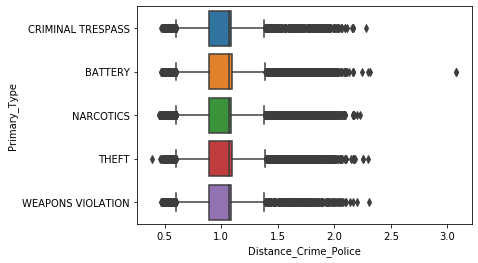

In [9]:
## boxplot para verificação da remoção dos outliers
lista = ["CRIMINAL TRESPASS", "BATTERY", "NARCOTICS", "THEFT", "WEAPONS VIOLATION"]
df2 = df.loc[df['Primary_Type'].isin(lista)]           
ax = sea.boxplot(x="Distance_Crime_Police", y="Primary_Type", data=df2)
ax.set_xlabel('Distance_Crime_Police')

## 2 - Data Modelation ##

### 2.1: Análise - Construindo e preparando o modelo ###

In [533]:
df.head()

,Case_Number,Block,Primary_Type,Description,Location_Description,Arrest.1,Domestic.1,Beat,District,Ward,...,Race,Month,Day,Temperature,Precipitation,HOUR,Date_Corrected,Time_Corrected,Latidude_Corrected_Std,Longitude_Corrected_Std
0,JC114978,007XX W 87TH ST,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,1,1,622,6,21,...,BLACK,1,13,-1.103892,-0.188464,0,01/13/2019,12:28:00,-1.167331,0.508636
1,JC114991,050XX W ADAMS ST,CRIMINAL TRESPASS,TO RESIDENCE,RESIDENCE,1,1,1533,15,28,...,WHITE HISPANIC,1,13,-1.103892,-0.188464,0,01/13/2019,12:30:00,0.556527,-1.358775
2,JC114996,006XX N DEARBORN ST,BATTERY,SIMPLE,BAR OR TAVERN,1,0,1832,18,42,...,WHITE,1,13,-1.103892,-0.188464,0,01/13/2019,12:45:00,0.738828,0.706005
3,JC115237,028XX W 71ST ST,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,0,1,831,8,18,...,BLACK,1,13,-1.103892,-0.188464,1,01/13/2019,01:00:00,-0.825275,-0.388801
4,JC115014,070XX S CHAPPEL AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE PORCH/HALLWAY,1,0,331,3,5,...,BLACK,1,13,-1.103892,-0.188464,1,01/13/2019,01:09:00,-0.797033,1.628746


In [489]:
from sklearn.model_selection import train_test_split
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['Time_Corrected', 'Latidude_Corrected', \
         'Description', \
         'Location_Description', 'Arrest', 'Domestic', \
         'Beat', 'District',  'Ward', 'Community_Area', \
         'Case_Number', 'Primary_Type', 'Latitude_Police_Corrected', \
         'Longitude_Police_Corrected', 'Distance_Crime_Police', 'Race', 'Month', 'Day', \
         'Temperature', 'Precipitation', 'Date_Corrected', 'ID']

# 1º Variável a ser prevista
atrib_prev = ['Longitude_Corrected']

## Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

## Definindo a taxa de split
split_test_size = 0.30

## Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [490]:
## Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


#### 2.1.1: Definir os modelos a utilizar - 1º versão ####

In [137]:
# Utilizando um classificador Naive Bayes, Decision tree
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from  sklearn import linear_model
from sklearn import neighbors

In [138]:
# Criando os modelos preditivos
modelo_v1 = GaussianNB()
modelo_v2 = tree.DecisionTreeClassifier()
modelo_v3 = linear_model.LinearRegression()
modelo_v4 = neighbors.KNeighborsRegressor()

In [493]:
# Treinando o modelo_v1
modelo_v1.fit(X_treino, Y_treino.ravel())

ValueError: could not convert string to float: '22:30:00'

#### 2.1.2: Análise - Preparação dos dados para a regressão múltipla ####

In [494]:
# Uma vez que deu erro no treino dos modelos é necessário preparar as variáveis
df.dtypes

ID                              int64
Case_Number                    object
Primary_Type                   object
Description                    object
Location_Description           object
Arrest                          int64
Domestic                        int64
Beat                            int64
District                        int64
Ward                          float64
Community_Area                  int64
Latidude_Corrected            float64
Longitude_Corrected           float64
Latitude_Police_Corrected     float64
Longitude_Police_Corrected    float64
Distance_Crime_Police         float64
Race                           object
Year                            int64
Month                           int64
Day                             int64
Temperature                   float64
Precipitation                 float64
Date_Corrected                 object
Time_Corrected                 object
dtype: object

In [495]:
## Corrigir a coluna "Case_Number" para inteiro
lista = []
for x in df["Case_Number"]:
    a = int(x[-6:])
    lista.append(a)
df["Case_Number"] = lista

In [567]:
## Adicionar a coluna "Hour_Corrected" para float

final = []
for x in df["Time_Corrected"]:
    if type(x)==datetime.time:
        a = float(x.hour)
        final.append(a)
    elif type(x)==datetime.datetime:
        final.append(x)
    elif type(x)==float:
        final.append(float(14)) # que é média que se fez para a coluna
    else:
        a = float(x[0:2])
        final.append(a)
df["Hour_Corrected"] = final
df["Hour_Corrected"]

In [575]:
## Adicionar a coluna "Minutes_Corrected" para float


final = []

for x in df["Time_Corrected"]:
    if type(x)==datetime.time:
        a = float(x.minute)
        final.append(a)
    elif type(x)==datetime.datetime:
        final.append(x)
    elif type(x)==float:
        final.append(float(0)) # que é média que se fez para a coluna
    else:
        a = float(x[3:5])
        final.append(a)
df["Minutes_Corrected"] = final

In [593]:
## Adicionar a coluna "Seconds_Corrected" para float


final = []

for x in df["Time_Corrected"]:
    if type(x)==datetime.time:
        a = float(x.second)
        final.append(a)
    elif type(x)==datetime.datetime:
        final.append(x)
    elif type(x)==float:
        final.append(float(0)) # que é média que se fez para a coluna
    else:
        a = float(x[6:8])
        final.append(a)
df["Seconds_Corrected"] = final

In [595]:
## Corrigir a coluna "Race" fazendo hot encoding - cada valor de um atributo tera numa diferente variavel com valores 0s e 1s
## Get one hot encoding of columns 'Race'
one_hot = pd.get_dummies(df['Race'], prefix="Race_")
# Drop column as it is now encoded
df = df.drop('Race',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [596]:
## Corrigir a coluna "Arrest" fazendo hot encoding - cada valor de um atributo tera numa diferente variavel com valores 0s e 1s
## Get one hot encoding of columns 'Arrest'
df['Arrest'] = df['Arrest'].replace([0],'False')
df['Arrest'] = df['Arrest'].replace([1],'True')
one_hot = pd.get_dummies(df['Arrest'], prefix="Arrest_")
# Drop column as it is now encoded
df = df.drop('Arrest',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [597]:
## Corrigir a coluna "Domestic" fazendo hot encoding - cada valor de um atributo tera numa diferente variavel com valores 0s e 1s
## Get one hot encoding of columns 'Arrest'
df['Domestic'] = df['Domestic'].replace([0],'False')
df['Domestic'] = df['Domestic'].replace([1],'True')
one_hot = pd.get_dummies(df['Domestic'], prefix="Domestic_")
# Drop column as it is now encoded
df = df.drop('Domestic',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [598]:
## Até agora fez-se o hot encoding mas apenas para atributos que tem poucos valores strings, agora, aqueles atributos
## que tem muitos valores strings apenas se fará a conversão para númericos (escolheu-se fazer assim porque se for poucos
## valores vão ser poucos atributos criados e por isso para o processamento não há problema, porém, se forem muitos
## há problema, daí para esses casos apenas se fazer a conversão para números)
## Corrigir a coluna "Primary_Type" para inteiro
df["Primary_Type"] = df["Primary_Type"].astype('category')
df["Primary_Type"] = df["Primary_Type"].cat.codes

In [599]:
## Corrigir a coluna "Location_Description" para inteiro
df["Location_Description"] = df["Location_Description"].astype('category')
df["Location_Description"] = df["Location_Description"].cat.codes

In [604]:
## Corrigir a coluna "Description" para inteiro
df["Description"] = df["Description"].astype('category')
df["Description"] = df["Description"].cat.codes
df.dtypes

Primary_Type                             int8
Description                             int16
Location_Description                     int8
Beat                                    int64
District                                int64
Ward                                  float64
Community_Area                          int64
Latidude_Corrected                    float64
Longitude_Corrected                   float64
Latitude_Police_Corrected             float64
Longitude_Police_Corrected            float64
Distance_Crime_Police                 float64
Year                                    int64
Month                                   int64
Day                                     int64
Temperature                           float64
Precipitation                         float64
Hour_Corrected                        float64
Minutes_Corrected                     float64
Seconds_Corrected                     float64
Race__AMER INDIAN / ALASKAN NATIVE      uint8
Race__ASIAN / PACIFIC ISLANDER    

In [607]:
## Depois de estar tudo convertido para números agora retira-se as colunas desnecessárias
#df = df.drop(columns=["Date_Corrected", "Time_Corrected", "ID", "Case_Number"], axis=1)
df.head()

,Primary_Type,Description,Location_Description,Beat,District,Ward,Community_Area,Latidude_Corrected,Longitude_Corrected,Latitude_Police_Corrected,...,Race__ASIAN / PACIFIC ISLANDER,Race__BLACK,Race__BLACK HISPANIC,Race__UNKNOWN / REFUSED,Race__WHITE,Race__WHITE HISPANIC,Arrest__False,Arrest__True,Domestic__False,Domestic__True
0,2,227,3,1651,16,41.0,76,41.98044,-87.79066,41.97409,...,1,0,0,0,0,0,0,1,1,0
1,8,244,7,1651,16,41.0,76,41.97900,-87.79064,41.97409,...,0,0,0,0,1,0,0,1,1,0
2,4,211,10,1651,16,41.0,76,41.97900,-87.79064,41.97409,...,0,0,0,0,1,0,0,1,1,0
3,8,244,4,1651,16,41.0,76,41.97900,-87.79064,41.97409,...,0,1,0,0,0,0,0,1,1,0
4,9,106,10,1651,16,41.0,76,41.97900,-87.79064,41.97409,...,0,1,0,0,0,0,0,1,1,0


In [608]:
# Escrever o ficheiro para a versão 3.3
#df.to_excel(r"C:\Python\MECD\IACEC\AllCrimeData3.3.xlsx")

In [235]:
df = pd.read_excel("AllCrimeData3.3.xlsx")
df.head()

,Primary_Type,Description,Location_Description,Beat,District,Ward,Community_Area,Latidude_Corrected,Longitude_Corrected,Latitude_Police_Corrected,...,Race__ASIAN / PACIFIC ISLANDER,Race__BLACK,Race__BLACK HISPANIC,Race__UNKNOWN / REFUSED,Race__WHITE,Race__WHITE HISPANIC,Arrest__False,Arrest__True,Domestic__False,Domestic__True
0,2,227,3,1651,16,41,76,41.98044,-87.79066,41.97409,...,1,0,0,0,0,0,0,1,1,0
1,8,244,7,1651,16,41,76,41.97900,-87.79064,41.97409,...,0,0,0,0,1,0,0,1,1,0
2,4,211,10,1651,16,41,76,41.97900,-87.79064,41.97409,...,0,0,0,0,1,0,0,1,1,0
3,8,244,4,1651,16,41,76,41.97900,-87.79064,41.97409,...,0,1,0,0,0,0,0,1,1,0
4,9,106,10,1651,16,41,76,41.97900,-87.79064,41.97409,...,0,1,0,0,0,0,0,1,1,0


In [236]:
a = list(map(lambda x: str(x).replace(".", ""), df["Latidude_Corrected"]))
teste = []
b = []
for x in a:
    if len(x)==7:
        teste.append(x)
    elif len(x)==6:
        ex = x+"0"
        teste.append(ex)
    elif len(x)==5:
        ex = x+"00"
        teste.append(ex)
    elif len(x)==4:
        ex = x+"000"
        teste.append(ex)
    elif len(x)==3:
        ex = x+"0000"
        teste.append(ex)
    else:
        b.append(x)
teste = list(map(lambda x: int(x), teste))
df["Latidude_Corrected"] = teste

In [237]:
a = list(map(lambda x: str(abs(x)).replace(".", ""), df["Longitude_Corrected"]))
teste = []
b = []
for x in a:
    if len(x)==7:
        teste.append(x)
    elif len(x)==6:
        ex = x+"0"
        teste.append(ex)
    elif len(x)==5:
        ex = x+"00"
        teste.append(ex)
    elif len(x)==4:
        ex = x+"000"
        teste.append(ex)
    elif len(x)==3:
        ex = x+"0000"
        teste.append(ex)
    else:
        b.append(x)
teste = list(map(lambda x: int(x), teste))
df["Longitude_Corrected"] = teste

In [238]:
# Antes de passar a modelação temos de fazer a feature selection, algo que já se fez anteriormente, porém,
# é necessário sublinhar mais uma vez, já que algumas variaveis sofreram transformações e outras foram criadas

df2 = df.loc[:, df.columns != 'Year']
## Correlação de Pearson
pearson = df2.corr(method='pearson')
pearson

,Primary_Type,Description,Location_Description,Beat,District,Ward,Community_Area,Latidude_Corrected,Longitude_Corrected,Latitude_Police_Corrected,...,Race__ASIAN / PACIFIC ISLANDER,Race__BLACK,Race__BLACK HISPANIC,Race__UNKNOWN / REFUSED,Race__WHITE,Race__WHITE HISPANIC,Arrest__False,Arrest__True,Domestic__False,Domestic__True
Primary_Type,1.000000,0.326479,0.195235,-0.011275,-0.011047,0.013801,-0.031530,0.012787,0.009528,0.008602,...,-0.024158,0.044786,-0.004863,-0.003194,-0.025095,-0.027256,-0.051312,0.051312,0.399660,-0.399660
Description,0.326479,1.000000,0.064749,0.002000,0.001825,0.026483,-0.043169,0.032883,-0.004772,0.030920,...,-0.001340,0.008019,-0.004936,-0.017721,0.031069,-0.029668,-0.076491,0.076491,0.332434,-0.332434
Location_Description,0.195235,0.064749,1.000000,-0.049134,-0.048489,-0.059474,0.055188,-0.097963,-0.005959,-0.101994,...,-0.025579,0.052794,-0.009939,-0.014777,-0.065775,-0.002741,-0.030961,0.030961,0.236125,-0.236125
Beat,-0.011275,0.002000,-0.049134,1.000000,0.999826,0.621999,-0.475210,0.619703,0.552324,0.634655,...,0.071919,-0.292352,0.033981,0.017752,0.169467,0.195720,0.066850,-0.066850,0.003198,-0.003198
District,-0.011047,0.001825,-0.048489,0.999826,1.000000,0.623759,-0.476053,0.620906,0.553221,0.634526,...,0.072227,-0.292442,0.034070,0.017820,0.169669,0.195567,0.066795,-0.066795,0.003257,-0.003257
Ward,0.013801,0.026483,-0.059474,0.621999,0.623759,1.000000,-0.518320,0.655893,0.511943,0.643489,...,0.072752,-0.204311,0.024407,0.023124,0.176695,0.084502,0.052847,-0.052847,0.049777,-0.049777
Community_Area,-0.031530,-0.043169,0.055188,-0.475210,-0.476053,-0.518320,1.000000,-0.774308,-0.305954,-0.746675,...,-0.074811,0.204841,-0.033722,-0.023649,-0.162593,-0.093229,-0.048985,0.048985,-0.072832,0.072832
Latidude_Corrected,0.012787,0.032883,-0.097963,0.619703,0.620906,0.655893,-0.774308,1.000000,0.604361,0.979887,...,0.090428,-0.324784,0.043377,0.028600,0.225263,0.183729,0.069016,-0.069016,0.067830,-0.067830
Longitude_Corrected,0.009528,-0.004772,-0.005959,0.552324,0.553221,0.511943,-0.305954,0.604361,1.000000,0.627946,...,0.013974,-0.246704,0.025323,0.003848,0.111329,0.203301,0.038011,-0.038011,0.018498,-0.018498
Latitude_Police_Corrected,0.008602,0.030920,-0.101994,0.634655,0.634526,0.643489,-0.746675,0.979887,0.627946,1.000000,...,0.092309,-0.350494,0.043579,0.027361,0.231262,0.209985,0.072850,-0.072850,0.061074,-0.061074


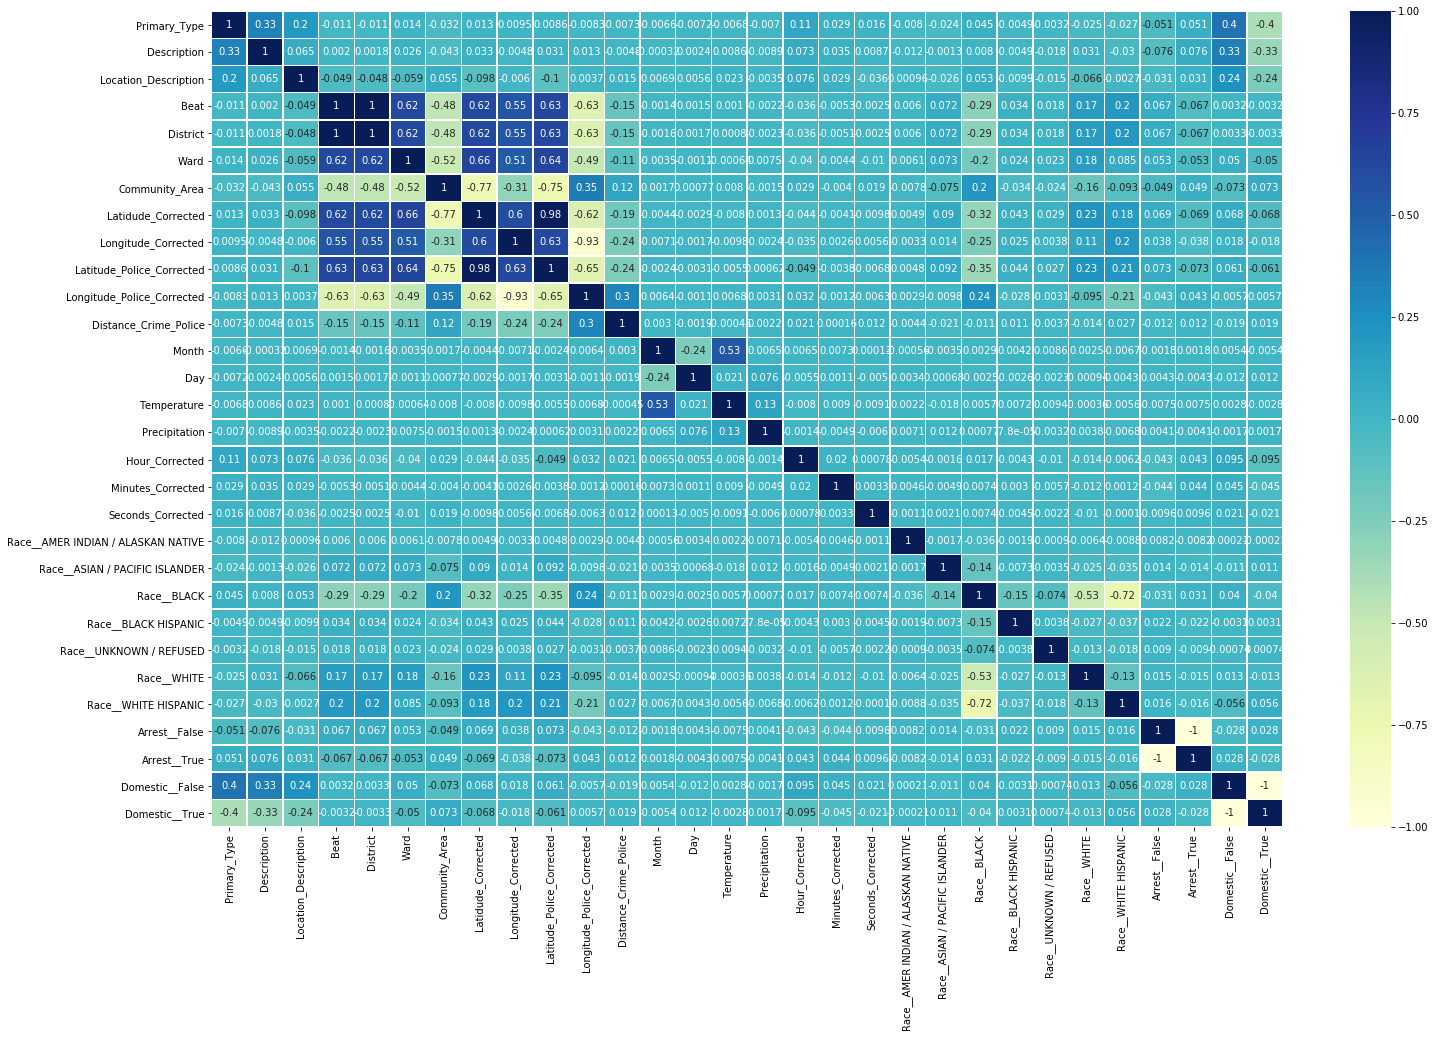

In [239]:
## De forma a ilustrar as correlações faz-se um gráfico

fig = plt.figure(figsize = (24, 15))
sea.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5)

In [240]:
# Agora spearman

df2 = df.loc[:, df.columns != 'Year']
## Correlação de Pearson
spearman = df2.corr(method='spearman')
spearman

,Primary_Type,Description,Location_Description,Beat,District,Ward,Community_Area,Latidude_Corrected,Longitude_Corrected,Latitude_Police_Corrected,...,Race__ASIAN / PACIFIC ISLANDER,Race__BLACK,Race__BLACK HISPANIC,Race__UNKNOWN / REFUSED,Race__WHITE,Race__WHITE HISPANIC,Arrest__False,Arrest__True,Domestic__False,Domestic__True
Primary_Type,1.000000,0.319553,0.230580,-0.005832,-0.005606,0.011913,-0.017221,0.004352,0.013054,0.001416,...,-0.022705,0.043254,-0.005711,-0.003539,-0.025938,-0.024811,-0.055208,0.055208,0.384678,-0.384678
Description,0.319553,1.000000,0.032744,-0.003466,-0.004498,0.013021,-0.018343,0.018200,-0.029023,0.019186,...,0.001717,0.009021,-0.003137,-0.016065,0.028480,-0.030457,-0.051316,0.051316,0.300026,-0.300026
Location_Description,0.230580,0.032744,1.000000,-0.047685,-0.046286,-0.074092,0.076260,-0.122059,0.007928,-0.117560,...,-0.023768,0.060851,-0.005828,-0.016095,-0.078464,-0.003646,-0.040309,0.040309,0.242844,-0.242844
Beat,-0.005832,-0.003466,-0.047685,1.000000,0.997240,0.641644,-0.583335,0.675667,0.671255,0.706815,...,0.061686,-0.284871,0.032767,0.014959,0.168296,0.190633,0.059635,-0.059635,0.021569,-0.021569
District,-0.005606,-0.004498,-0.046286,0.997240,1.000000,0.650681,-0.587651,0.685707,0.682005,0.708578,...,0.062077,-0.284973,0.033674,0.014851,0.169626,0.189411,0.059948,-0.059948,0.021877,-0.021877
Ward,0.011913,0.013021,-0.074092,0.641644,0.650681,1.000000,-0.555692,0.641444,0.558281,0.629949,...,0.062332,-0.197690,0.023281,0.020600,0.165281,0.088399,0.050316,-0.050316,0.050091,-0.050091
Community_Area,-0.017221,-0.018343,0.076260,-0.583335,-0.587651,-0.555692,1.000000,-0.827104,-0.412993,-0.820682,...,-0.072921,0.235752,-0.040210,-0.023144,-0.172128,-0.122274,-0.056690,0.056690,-0.066499,0.066499
Latidude_Corrected,0.004352,0.018200,-0.122059,0.675667,0.685707,0.641444,-0.827104,1.000000,0.601494,0.980308,...,0.082895,-0.334606,0.047144,0.028807,0.228299,0.194089,0.071670,-0.071670,0.067490,-0.067490
Longitude_Corrected,0.013054,-0.029023,0.007928,0.671255,0.682005,0.558281,-0.412993,0.601494,1.000000,0.621278,...,0.010914,-0.251190,0.027090,0.001664,0.099954,0.218130,0.036350,-0.036350,0.016998,-0.016998
Latitude_Police_Corrected,0.001416,0.019186,-0.117560,0.706815,0.708578,0.629949,-0.820682,0.980308,0.621278,1.000000,...,0.083587,-0.329180,0.044364,0.026974,0.224291,0.191384,0.074568,-0.074568,0.063162,-0.063162


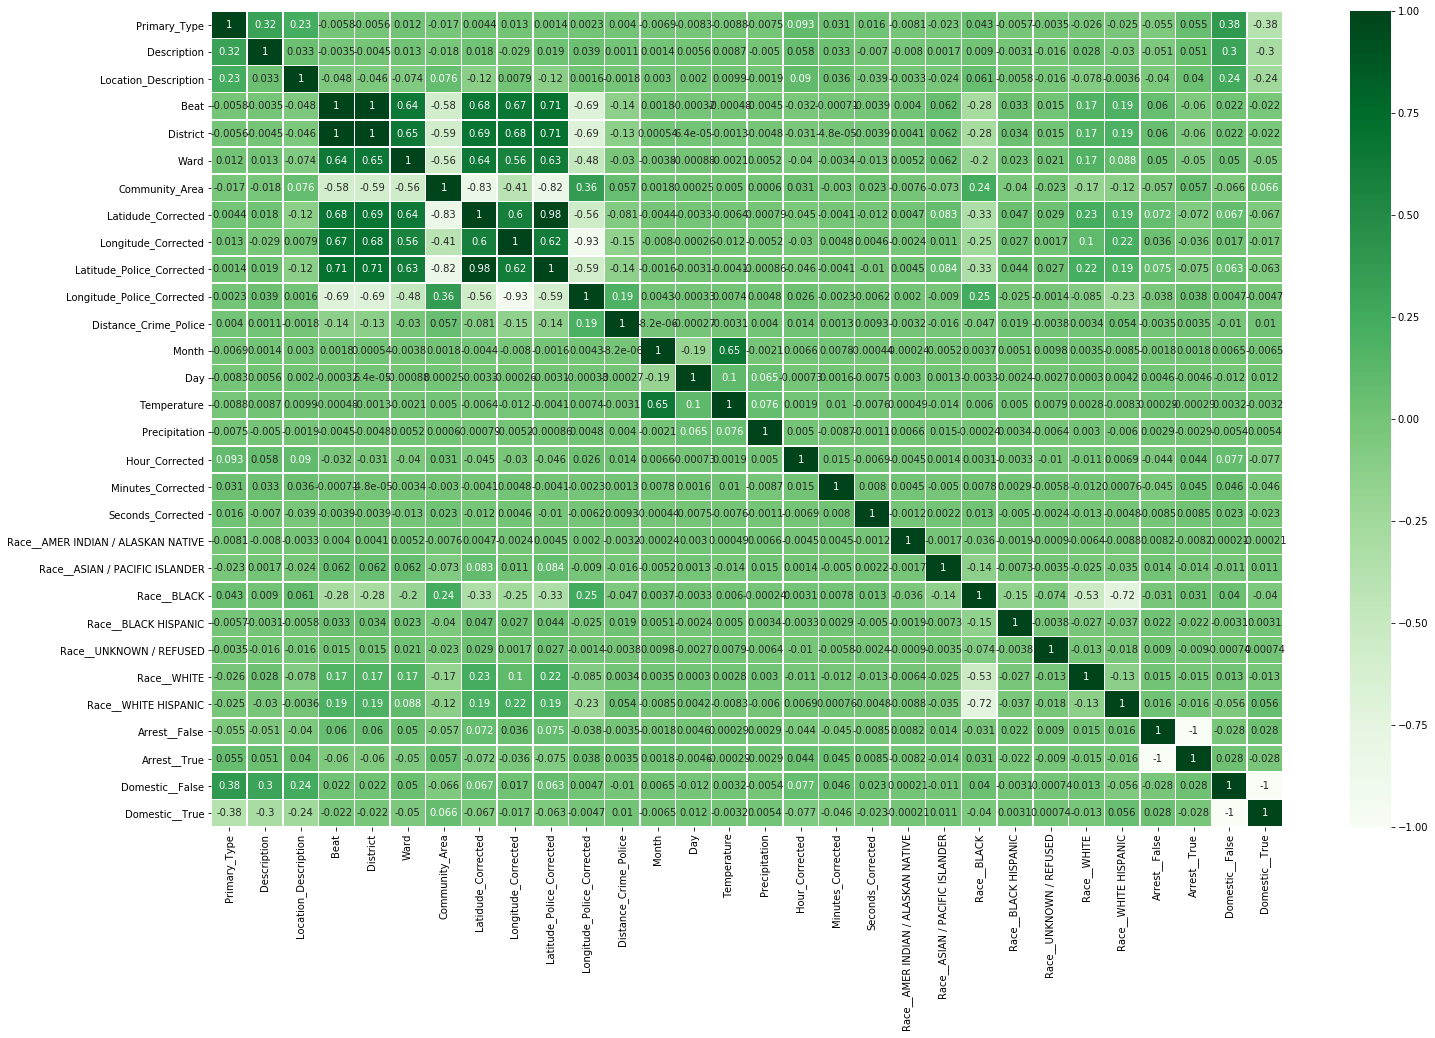

In [241]:
fig = plt.figure(figsize = (24, 15))
sea.heatmap(spearman, 
            xticklabels=spearman.columns,
            yticklabels=spearman.columns,
            cmap='Greens',
            annot=True,
            linewidth=0.5)

In [242]:
# "Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. 
# So, when two features have high correlation, we can drop one of the two features."

## Teste
columns = np.full((pearson.shape[0],), True, dtype=bool)
for i in range(pearson.shape[0]):
    for j in range(i+1, spearman.shape[0]):
        if pearson.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df2.columns[columns]
data = df2[selected_columns]
print("Dataset com feature selection " + str(len(data.columns)))
print("Dataset sem feature selection " + str(len(df.columns)))
print("Diferença " + str(len(data.columns) - len(df.columns)))

Dataset com feature selection 28
Dataset sem feature selection 31
Diferença -3


In [243]:
# Novo dataset com feature selection
df = data

In [244]:
len(df.columns)

28

#### 2.1.3: Definir os modelos a utilizar - 2º versão ####

In [245]:
from sklearn.model_selection import train_test_split
# Definir dados de treino e teste
atributos = list(df.columns)
atrib_prev = ['Latidude_Corrected']
atrib_prev2 = ['Longitude_Corrected']
atributos_latitude = [x for x in atributos if x not in atrib_prev]
atributos_longitude = [x for x in atributos if x not in atrib_prev2]

# Criando objetos - Latitude
X = df[atributos_latitude].values #todos os atributos menos latitude_corrected
Y = df[atrib_prev].values #

# Criando objetos - Longitude
X2 = df[atributos_longitude].values
Y2 = df[atrib_prev2].values

# Definindo a taxa de split
split_test_size = 0.35

# Criando dados de treino e de teste
## Latitude 
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 17)

# Criando dados de treino e de teste
## Longitude 
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(X2, Y2, test_size = split_test_size, random_state = 17)

##### 2.1.3.1: KNN Regression - Latitude #####

In [246]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
modelo_v4 = neighbors.KNeighborsRegressor()

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    modelo_v4 = neighbors.KNeighborsRegressor(n_neighbors = K)

    modelo_v4.fit(X_treino, Y_treino)  #fit the model
    pred=modelo_v4.predict(X_teste) #make prediction on test set
    
    valores_previstos_latitude_corretos = []
    Y_teste_correto = []

    for x in pred:
        for y in x:
            valores_previstos_latitude_corretos.append(round(y, 2))
        
    for x in Y_teste:
        for y in x:
            Y_teste_correto.append(round(y, 2))    
    
    error = sqrt(mean_squared_error(Y_teste_correto,valores_previstos_latitude_corretos)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1142.3844159377963
RMSE value for k=  2 is: 1023.5923515751733
RMSE value for k=  3 is: 994.2425229547252
RMSE value for k=  4 is: 979.467843067222
RMSE value for k=  5 is: 973.8023399572494
RMSE value for k=  6 is: 975.7927739288418
RMSE value for k=  7 is: 974.924025427922
RMSE value for k=  8 is: 974.7750091188987
RMSE value for k=  9 is: 980.0183394568331
RMSE value for k=  10 is: 984.375376205187
RMSE value for k=  11 is: 987.8271467617946
RMSE value for k=  12 is: 990.9575249857825
RMSE value for k=  13 is: 995.1394294104223
RMSE value for k=  14 is: 1000.9462969495128
RMSE value for k=  15 is: 1004.6752175288307
RMSE value for k=  16 is: 1008.3362125847243
RMSE value for k=  17 is: 1012.6210679667544
RMSE value for k=  18 is: 1015.0343612923705
RMSE value for k=  19 is: 1018.8690625208936
RMSE value for k=  20 is: 1022.7664718811174


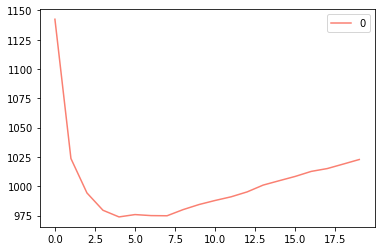

In [247]:
#plotting the rmse values against k values - Neste caso o melhor K está entre os 2?
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [248]:
# Uma vez que sabemos o melhor K a usar tendo em conta o RMSE então vamos prever tendo em conta isso
modelo_v4 = neighbors.KNeighborsRegressor(n_neighbors = 3) #
modelo_v4.fit(X_treino, Y_treino)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [249]:
# Use the KNN's predict method on the test data
pred=modelo_v4.predict(X_teste) #make prediction on test set
# Calculate the absolute errors
predictions2 = np.array(list(map(lambda x: int(abs(x)), pred)))
tests2 = np.array(list(map(lambda x: int(abs(x)), Y_teste)))
result = abs(predictions2 - tests2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(result))

Mean Absolute Error: 676.1821425385782


In [250]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (result / tests2)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('MAPE:', np.mean(mape))
print('Accuracy:', accuracy, '%.')

MAPE: 0.016170093844673276
Accuracy: 99.98382990615532 %.


In [251]:
# Uma vez calculado as métricas, é hora de se mostrar a comparação dos valores previstos com os observados

lista_previstos_latitude = predictions2.tolist()
lista_observados_latitude = tests2.tolist()
tipo_previsto_latitude = []
tipo_observado_latitude = []

x = 1
while x <= len(lista_previstos_latitude):
    tipo_previsto_latitude.append("Previsto")
    x += 1


x = 1
while x <= len(lista_observados_latitude):
    tipo_observado_latitude.append("Observado")
    x += 1

In [252]:
# Dados sobre obervados
dados_obervados = pd.DataFrame(list(zip(lista_observados_latitude, tipo_observado_latitude)))  
dados_obervados.columns = ["Dados", "Tipo"]


# Concatenação das colunas e formação do dataframe para o gráfico
frames1 = [dados_obervados]
result1 = pd.concat(frames1)
result1['Numero'] = [x for x in range(1, len(result1)+1)]



# Dados previstos
dados_previstos = pd.DataFrame(list(zip(lista_previstos_latitude, tipo_previsto_latitude)))  
dados_previstos.columns = ["Dados", "Tipo"]

# Concatenação das colunas e formação do dataframe para o gráfico
frames2 = [dados_previstos]
result2 = pd.concat(frames2)
result2['Numero'] = [x for x in range(1, len(result2)+1)]

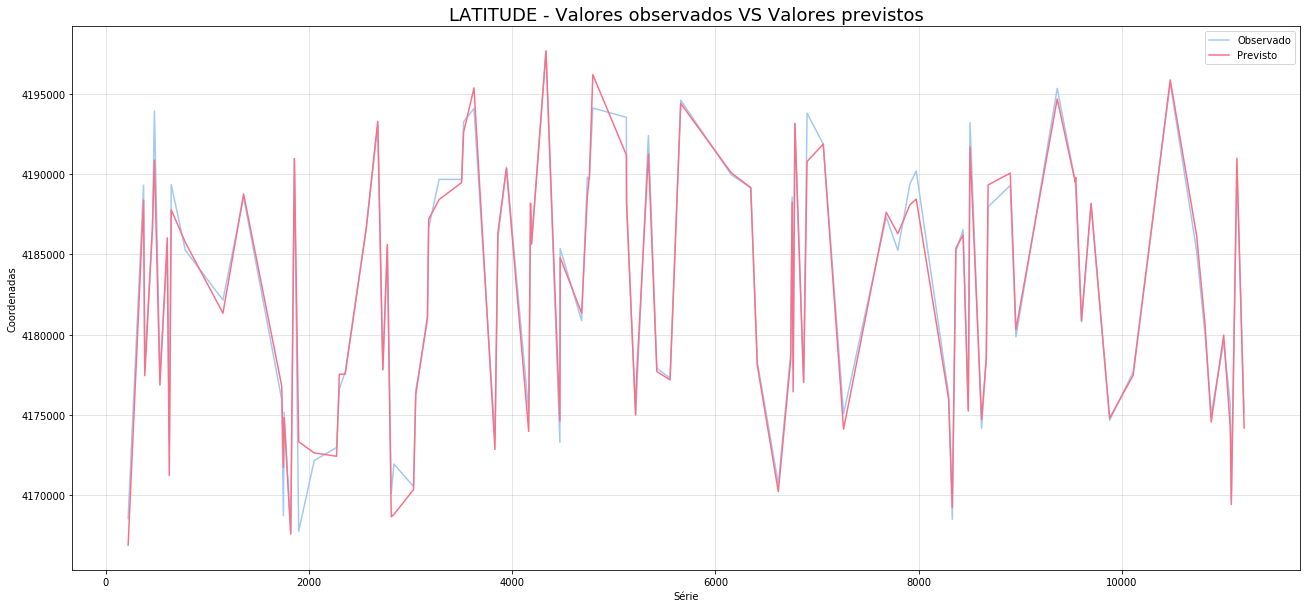

In [253]:
# Gráfico
plt.figure(figsize=(22,10))
sea.set_palette("pastel")
ax = sea.lineplot(
    data=result1.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
sea.set_palette("husl")
ax = sea.lineplot(
    data=result2.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
plt.ylabel('Coordenadas')
plt.title('LATITUDE - Valores observados VS Valores previstos', fontsize=18)
plt.xlabel("Série",  fontsize=10)
plt.grid(alpha = 0.4, zorder=2)
plt.legend()
plt.show()


##### 2.1.3.2: KNN Regression - Longitude #####

In [254]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
modelo_v4 = neighbors.KNeighborsRegressor()

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    modelo_v4 = neighbors.KNeighborsRegressor(n_neighbors = K)

    modelo_v4.fit(X_treino2, Y_treino2)  #fit the model
    pred=modelo_v4.predict(X_teste2) #make prediction on test set
    
    valores_previstos_longitude_corretos = []
    Y_teste_correto2 = []

    for x in pred:
        for y in x:
            valores_previstos_longitude_corretos.append(round(y, 5))

    for x in Y_teste2:
        for y in x:
            Y_teste_correto2.append(y)   
    
    error = sqrt(mean_squared_error(Y_teste_correto2,valores_previstos_longitude_corretos)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 166.86832853711857
RMSE value for k=  2 is: 151.45720837628514
RMSE value for k=  3 is: 145.90432433857936
RMSE value for k=  4 is: 145.78114767698193
RMSE value for k=  5 is: 146.43793916759017
RMSE value for k=  6 is: 147.28884352425416
RMSE value for k=  7 is: 147.66307934699688
RMSE value for k=  8 is: 148.66735894412852
RMSE value for k=  9 is: 149.63449972016386
RMSE value for k=  10 is: 151.13866827367787
RMSE value for k=  11 is: 152.3979892642609
RMSE value for k=  12 is: 153.87573192065554
RMSE value for k=  13 is: 155.30715925718044
RMSE value for k=  14 is: 156.48536025904033
RMSE value for k=  15 is: 158.10518099558456
RMSE value for k=  16 is: 159.22928956238326
RMSE value for k=  17 is: 160.46539008056055
RMSE value for k=  18 is: 161.826739236409
RMSE value for k=  19 is: 162.8254815164629
RMSE value for k=  20 is: 164.149343495992


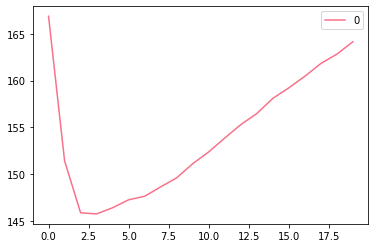

In [255]:
#plotting the rmse values against k values - Neste caso o melhor K está entre os 2?
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [257]:
# Uma vez que sabemos o melhor K a usar tendo em conta o RMSE então vamos prever tendo em conta isso
modelo_v4 = neighbors.KNeighborsRegressor(n_neighbors = 3) #
modelo_v4.fit(X_treino2, Y_treino2)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [258]:
# Use the KNN's predict method on the test data
pred=modelo_v4.predict(X_teste2) #make prediction on test set
# Calculate the absolute errors
predictions2 = np.array(list(map(lambda x: int(abs(x)), pred)))
tests2 = np.array(list(map(lambda x: int(abs(x)), Y_teste2)))
result = abs(predictions2 - tests2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(result))

Mean Absolute Error: 93.63812327178664


In [259]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (result / tests2)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('MAPE:', np.mean(mape))
print('Accuracy:', accuracy, '%.')

MAPE: 0.0010668880286098955
Accuracy: 99.9989331119714 %.


In [260]:
# Uma vez calculado as métricas, é hora de se mostrar a comparação dos valores previstos com os observados

lista_previstos_latitude = predictions2.tolist()
lista_observados_latitude = tests2.tolist()
tipo_previsto_latitude = []
tipo_observado_latitude = []

x = 1
while x <= len(lista_previstos_latitude):
    tipo_previsto_latitude.append("Previsto")
    x += 1


x = 1
while x <= len(lista_observados_latitude):
    tipo_observado_latitude.append("Observado")
    x += 1

In [261]:
# Dados sobre obervados
dados_obervados = pd.DataFrame(list(zip(lista_observados_latitude, tipo_observado_latitude)))  
dados_obervados.columns = ["Dados", "Tipo"]


# Concatenação das colunas e formação do dataframe para o gráfico
frames1 = [dados_obervados]
result1 = pd.concat(frames1)
result1['Numero'] = [x for x in range(1, len(result1)+1)]



# Dados previstos
dados_previstos = pd.DataFrame(list(zip(lista_previstos_latitude, tipo_previsto_latitude)))  
dados_previstos.columns = ["Dados", "Tipo"]

# Concatenação das colunas e formação do dataframe para o gráfico
frames2 = [dados_previstos]
result2 = pd.concat(frames2)
result2['Numero'] = [x for x in range(1, len(result2)+1)]

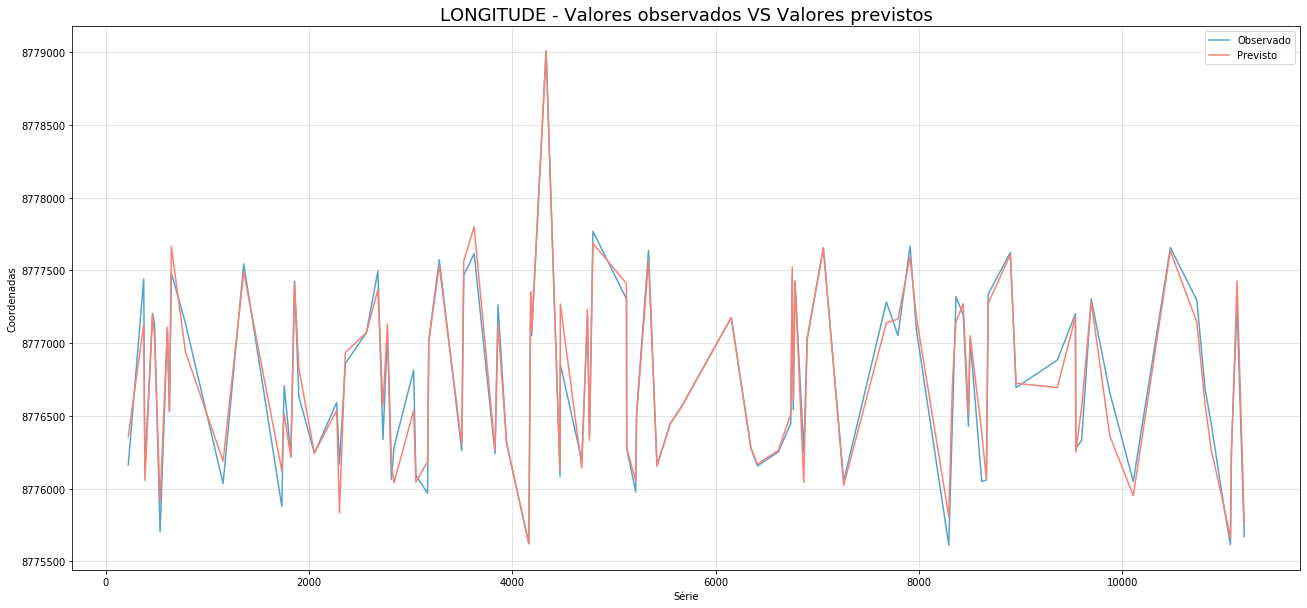

In [262]:
# Gráfico
plt.figure(figsize=(22,10))
sea.set_palette("icefire")
ax = sea.lineplot(
    data=result1.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
sea.set_palette("dark:salmon_r")
ax = sea.lineplot(
    data=result2.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
plt.ylabel('Coordenadas')
plt.title('LONGITUDE - Valores observados VS Valores previstos', fontsize=18)
plt.xlabel("Série",  fontsize=10)
plt.grid(alpha = 0.4, zorder=2)
plt.legend()
plt.show()

##### 2.1.3.3: Random Forest - Latitude #####

In [263]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 17)
# Train the model on training data
rf.fit(X_treino, Y_treino.ravel());

In [264]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_teste)
# Calculate the absolute errors
predictions2 = np.array(list(map(lambda x: int(abs(x)), predictions)))
tests2 = np.array(list(map(lambda x: int(abs(x)), Y_teste)))
result = abs(predictions2 - tests2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(result))

Mean Absolute Error: 30.666131478012666


In [265]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (result / tests2)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('MAPE:', np.mean(mape))
print('Accuracy:', accuracy, '%.')

MAPE: 0.0007329650999482729
Accuracy: 99.99926703490006 %.


In [266]:
# Uma vez calculado as métricas, é hora de se mostrar a comparação dos valores previstos com os observados

lista_previstos_latitude = predictions2.tolist()
lista_observados_latitude = tests2.tolist()
tipo_previsto_latitude = []
tipo_observado_latitude = []

x = 1
while x <= len(lista_previstos_latitude):
    tipo_previsto_latitude.append("Previsto")
    x += 1


x = 1
while x <= len(lista_observados_latitude):
    tipo_observado_latitude.append("Observado")
    x += 1

In [267]:
# Dados sobre obervados
dados_obervados = pd.DataFrame(list(zip(lista_observados_latitude, tipo_observado_latitude)))  
dados_obervados.columns = ["Dados", "Tipo"]


# Concatenação das colunas e formação do dataframe para o gráfico
frames1 = [dados_obervados]
result1 = pd.concat(frames1)
result1['Numero'] = [x for x in range(1, len(result1)+1)]



# Dados previstos
dados_previstos = pd.DataFrame(list(zip(lista_previstos_latitude, tipo_previsto_latitude)))  
dados_previstos.columns = ["Dados", "Tipo"]

# Concatenação das colunas e formação do dataframe para o gráfico
frames2 = [dados_previstos]
result2 = pd.concat(frames2)
result2['Numero'] = [x for x in range(1, len(result2)+1)]

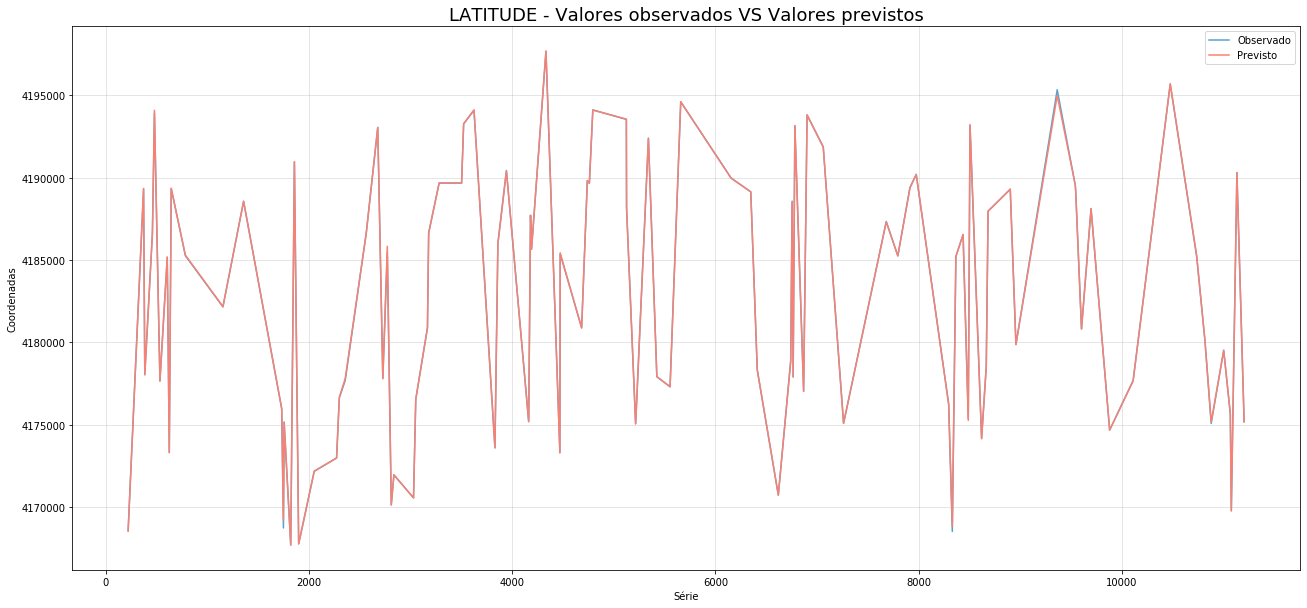

In [268]:
# Gráfico
plt.figure(figsize=(22,10))
sea.set_palette("icefire")
ax = sea.lineplot(
    data=result1.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
sea.set_palette("dark:salmon_r")
ax = sea.lineplot(
    data=result2.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
plt.ylabel('Coordenadas')
plt.title('LATITUDE - Valores observados VS Valores previstos', fontsize=18)
plt.xlabel("Série",  fontsize=10)
plt.grid(alpha = 0.4, zorder=2)
plt.legend()
plt.show()

##### 2.1.3.4: Random Forest - Longitude #####

In [269]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 17)
# Train the model on training data
rf.fit(X_treino2, Y_treino2.ravel());

In [270]:
# Use the forest's predict method on the test data
predictions2 = rf.predict(X_teste2)
# Calculate the absolute errors
predictions3 = np.array(list(map(lambda x: int(abs(x)), predictions2)))
tests3 = np.array(list(map(lambda x: int(abs(x)), Y_teste2)))
result = abs(predictions3 - tests3)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(result))

Mean Absolute Error: 23.277495317099277


In [271]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (result / tests3)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('MAPE:', np.mean(mape))
print('Accuracy:', accuracy, '%.')

MAPE: 0.00026521906960976145
Accuracy: 99.9997347809304 %.


In [272]:
# Uma vez calculado as métricas, é hora de se mostrar a comparação dos valores previstos com os observados

lista_previstos_latitude = predictions3.tolist()
lista_observados_latitude = tests3.tolist()
tipo_previsto_latitude = []
tipo_observado_latitude = []

x = 1
while x <= len(lista_previstos_latitude):
    tipo_previsto_latitude.append("Previsto")
    x += 1


x = 1
while x <= len(lista_observados_latitude):
    tipo_observado_latitude.append("Observado")
    x += 1

In [273]:
# Dados sobre obervados
dados_obervados = pd.DataFrame(list(zip(lista_observados_latitude, tipo_observado_latitude)))  
dados_obervados.columns = ["Dados", "Tipo"]


# Concatenação das colunas e formação do dataframe para o gráfico
frames1 = [dados_obervados]
result1 = pd.concat(frames1)
result1['Numero'] = [x for x in range(1, len(result1)+1)]



# Dados previstos
dados_previstos = pd.DataFrame(list(zip(lista_previstos_latitude, tipo_previsto_latitude)))  
dados_previstos.columns = ["Dados", "Tipo"]

# Concatenação das colunas e formação do dataframe para o gráfico
frames2 = [dados_previstos]
result2 = pd.concat(frames2)
result2['Numero'] = [x for x in range(1, len(result2)+1)]

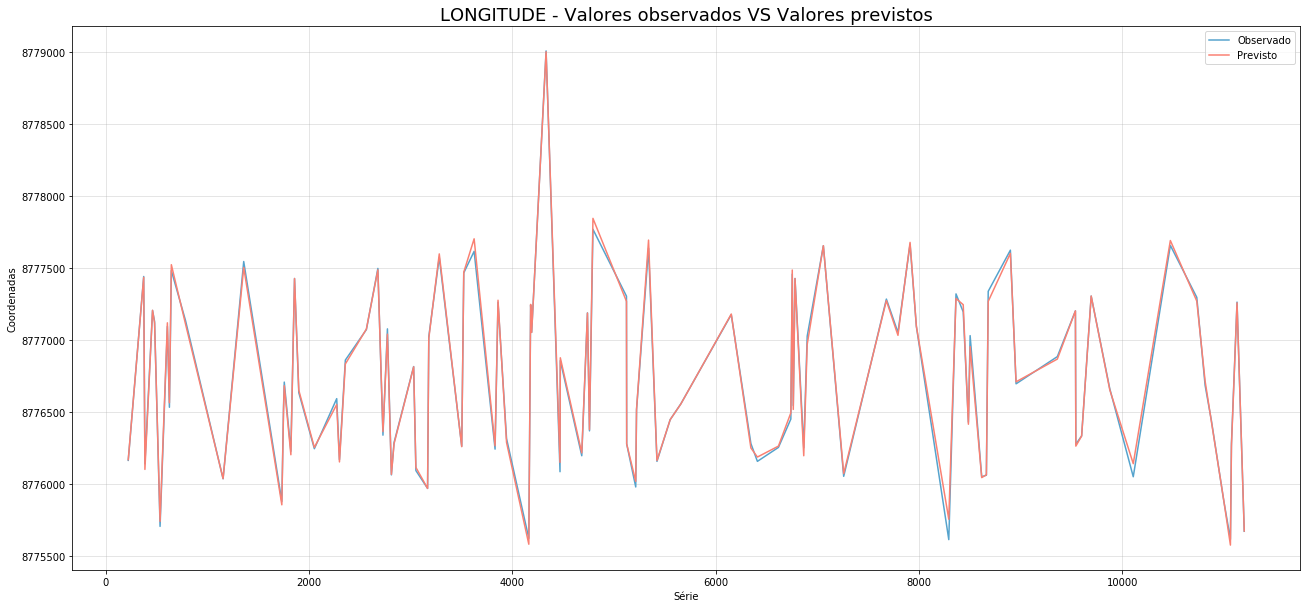

In [274]:
## Gráfico
plt.figure(figsize=(22,10))
sea.set_palette("icefire")
ax = sea.lineplot(
    data=result1.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
sea.set_palette("dark:salmon_r")
ax = sea.lineplot(
    data=result2.sample(n=100, random_state=1),
    x="Numero", y="Dados", hue="Tipo",
    markers=True, dashes=False
)
plt.ylabel('Coordenadas')
plt.title('LONGITUDE - Valores observados VS Valores previstos', fontsize=18)
plt.xlabel("Série",  fontsize=10)
plt.grid(alpha = 0.4, zorder=2)
plt.legend()
plt.show()

##### 2.1.3.5: Regressão - Latitude #####

##### 2.1.3.6: Regressão - Longitude #####

#### 2.1.4: Definir os modelos a utilizar - Otimização ####

##### 2.1.4.1: Otimização Random Forest - Longitude #####

###### 2.1.4.1.1: RandomizedSearchCV ######

###### 2.1.4.1.2: GridSearchCV ######

##### 2.1.4.2: Otimização Random Forest - Latitude #####

###### 2.1.4.2.1: RandomizedSearchCV ######

###### 2.1.4.2.2: GridSearchCV ######

In [ ]:
##APARTE#
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE




# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(n_estimators = 20, random_state = 17)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_treino2, Y_treino2.ravel())




In [ ]:
##APARTE#
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Modelo 
rf = RandomForestRegressor()

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 28))}]

# Folds

# Perform grid search
# 3.1 specify model
rf = RandomForestRegressor(n_estimators = 20, random_state = 17)
rf.fit(X_treino2, Y_treino2.ravel())
rfe = RFE(rf)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_treino2, Y_treino2.ravel())      